 <h1 align="center"><font size="5">Natural Language Processig for Clinical Data </font></h1>

 <h1 align="center"><font size="4">Named Entity Recognition (NER) VS Generative AI - ChatGPT4  </font></h1>

 <h1 align="center"><font size="4">Extracting Medical Conditios and Drug/Treatment </font></h1>

<div class="alert alert-info"><p>


Here NER and generative AI models will be used to extract medical conditions/diseases and treatment from a public clinical dataset. The models selected for the extraction are as follows:

- **Med7** a transformer for NER trained on a collection of 2 million free-text patients' records from MIMIC-III corpora with seven entity labels.
- **spaCy NER** model trained on BC5CDR corpus with two entity labels.
- **ChatGPT4** Generative Pre-trained Transformer 4 (GPT-4), a multimodal large language model created by OpenAI pre-trained using both public data, data licensed from third-party providers and fine-tuned with reinforcement learning feedback from humans and AI for human alignment and policy compliance.</p></div>

The above NERs models have been trained with medical text and have shown accuracies above 80% and 90 % [1-2]. Clinical text processing is a critical application area of natural language processing. Therefore, robust, interpretable, practical, publicly available models are required. Here, we will compare the accurate extraction using the three models for different data from a public clinical dataset [3].

On the other hand, generative models such as ChatGPT4 [4] were demonstrated to be effective at extracting text in medical settings. However, limitations and concerns about the models’ transparency and reproducibility of the results can outweigh their benefits [5].

### References:

---

1.  [Spacy en_ner_bc5cdr_md model](https://arxiv.org/pdf/1902.07669.pdf) Neumann, M., King, D., Beltagy, I., & Ammar, W. (2019). ScispaCy: Fast and Robust Models for Biomedical Natural Language Processing. ArXiv, abs/1902.07669.
2. [Med7](https://doi.org/10.1016/j.artmed.2021.102086) Kormilitzin, A., Vaci, N., Liu, Q., & Nevado-Holgado, A. (2021). Med7: A transferable clinical natural language processing model for electronic health records. Artificial intelligence in medicine, 118, 102086.
3. [Dataset:](https://doi.org/10.48550/arXiv.2301.00280) Zomorodi, M., Ghodsollahee, I., Pławiak, P., & Acharya, U.R. (2022). RECOMMED: A Comprehensive Pharmaceutical Recommendation System. 10.48550/arXiv.2301.00280.  
4. [ChatGPT4 -API](https://openai.com/product) OpenAI API
5. [Beyond ChatGPT](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10713213/) Beyond ChatGPT: What does GPT-4 add to healthcare? The dawn of a new era.

---

### Table of Contents

1. Data Adquisition
2. Exploratory data Analysis and Processinng
3. Content base filtering
4. Torchrech

## Data collection

- Dataset sourced from [DatasetsLibrary -GitHub](https://github.com/DatasetsLibrary/RECOMMED).
- To download the data from the GitHub repository, we will use the bash command **`!wget`**.
- To decompress the file use **`unzip`**


In [ ]:
import os
from pathlib import Path
from collections import Counter

In [ ]:
from IPython.display import display_pretty, display_html, display_jpeg, display_png, display_json, display_latex, display_svg
from IPython.display import FileLink, FileLinks
from IPython.display import HTML, Latex, Math

In [ ]:
PATH = Path.cwd().joinpath('RECOMMED-main', 'DrugRating.csv')

if not PATH.exists():
    !wget -O main.zip https://github.com/DatasetsLibrary/RECOMMED/archive/refs/heads/main.zip
    !unzip -o main.zip
else:
    print('Dataset already downloaded and unzipped')

Dataset already downloaded and unzipped


In [ ]:
!ls './RECOMMED-main'

DrugInteraction.csv DrugRating.csv      README.md


## Data Prepocessing

In [ ]:
import warnings
warnings.filterwarnings("ignore", "\nPyarrow", DeprecationWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drugs_rating= pd.read_csv(PATH)
drugs_rating.head(3)

,3351,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,F1,F2,F3,F4,F5,F6,,F1,,,,,,,NaN
1,Level,Age,Genus,Condition Reason,Other Condition,Other Drag,DrugName,Category,OverallRating,Effectiveness,SideEffect,Dosage,Benefit,SideEffect,Comment Review
2,patient,22,male,Depression,Sleeplesness,Nil,Mirtazapine,Adrenergic-Alpha-Antagonists Histamine-H1-Anta...,1,Ineffective,Severe Side Effects,15mg taken once daily for the period of 2 Months,Nil,now taking temazepam to help with sleeping and...,-


### Columns Header

The dataframe shows that the header is the first row of the data frame (row index 0 in Python), a new header will be created with the names of this row. If spelling and repeated named columns will be also change with a name that represents the content.

In [ ]:
# Get the new header with the row 0 and replace the name of the first side effect name to SideEffect-level
header = [f.replace(' ', '') for f in drugs_rating.iloc[1]]
header[2] = 'Gender'
header[5] = 'OtherDrug'
header[10] = 'SideEffectLevel'

# Add new header
drugs_rating.columns = header

In [ ]:
drugs_rating = drugs_rating.iloc[2:]

In [ ]:
drugs_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 2 to 3292
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Level            3291 non-null   object
 1   Age              3291 non-null   object
 2   Gender           3291 non-null   object
 3   ConditionReason  3289 non-null   object
 4   OtherCondition   2776 non-null   object
 5   OtherDrug        2829 non-null   object
 6   DrugName         3291 non-null   object
 7   Category         3291 non-null   object
 8   OverallRating    3291 non-null   object
 9   Effectiveness    3291 non-null   object
 10  SideEffectLevel  3291 non-null   object
 11  Dosage           3291 non-null   object
 12  Benefit          3271 non-null   object
 13  SideEffect       3214 non-null   object
 14  CommentReview    3270 non-null   object
dtypes: object(15)
memory usage: 385.8+ KB


In [ ]:
drugs_rating

,Level,Age,Gender,ConditionReason,OtherCondition,OtherDrug,DrugName,Category,OverallRating,Effectiveness,SideEffectLevel,Dosage,Benefit,SideEffect,CommentReview
2,patient,22,male,Depression,Sleeplesness,Nil,Mirtazapine,Adrenergic-Alpha-Antagonists Histamine-H1-Anta...,1,Ineffective,Severe Side Effects,15mg taken once daily for the period of 2 Months,Nil,now taking temazepam to help with sleeping and...,-
3,patient,38,male,Clinical Depression,NaN,NaN,Mirtazapine,Adrenergic-Alpha-Antagonists Histamine-H1-Anta...,2,Ineffective,Moderate Side Effects,30mg taken daily (evening) for the period of ...,Did improve my appetite; which was suffering a...,Mild weight gain. Period of tiredness for two ...,Was prescribed as an alternative to Citalopram...
4,patient,30,female,Chronic insomnia,Anxiety; panic attacks,Epilium,Mirtazapine,Adrenergic-Alpha-Antagonists Histamine-H1-Anta...,9,Highly Effective,Moderate Side Effects,30 mg taken take one hour before bed for the ...,-night time sleep (at least 5-6 hours per nigh...,Constant feeling of hunger( feeling of empty s...,Hour before bed: 30 mg mirtazapine( avanza) an...
5,patient,19,female,Depression; Anxiety; OCD; Nausea,CFS; IBS; insomnia,Lansoprazole; Loestrin 30,Mirtazapine,Adrenergic-Alpha-Antagonists Histamine-H1-Anta...,2,Ineffective,Mild Side Effects,30mg taken once a day for the period of 7 months,Helped me easily get a good sleep. Possible re...,Too tired to get up in morning; irritability; ...,Did little if anything for depression and anxi...
6,-,-,-,Anxiety/insomnia,/na,Oxazapam 30,Mirtazapine,Adrenergic-Alpha-Antagonists Histamine-H1-Anta...,6,Ineffective,Moderate Side Effects,30mg taken 1 at night for the period of 1 month,6hrs sleep per night. Vivid dreams. No other s...,Morning anxiety ++,30mg daily oxazepam 30 prn x3 max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,patient,32,male,hair loss,none,none,Proscar (Finasteride),Urinary-Tract-Agents,7,Moderately Effective,Moderate Side Effects,2.5 mg per day taken every day for the period...,in taking finasteride 2.5mg per day for six mo...,the side effects of taking finasteride 2.5mg p...,The treatment details were the oral intake of ...
3289,patient,30,male,hair loss,none,none,Proscar (Finasteride),Urinary-Tract-Agents,8,Highly Effective,No Side Effects,1mg taken daily for the period of 1 year,back. i no longer look older than i feel and t...,it is hard to say what where really side effec...,the tablets every morning around 8am once a day.
3290,patient,30,male,hairloss,good improvement,NaN,Proscar (Finasteride),Urinary-Tract-Agents,7,Considerably Effective,Moderate Side Effects,1mg taken 1 pill per day for the period of on...,good hair growth,Generic propecia can cause some side effects; ...,Prominent hair growth front of the mid-scalp a...
3291,patient,40,male,Hair loss,none,inderal for migraine,Proscar (Finasteride),Urinary-Tract-Agents,1,Moderately Effective,Severe Side Effects,1mg taken daily for the period of 10 months,Testiclular Atrophy (permenent shrinkage). I a...,Testiclular Atrophy (permenent shrinkage). I a...,1mg a day


In [ ]:
import missingno as msno

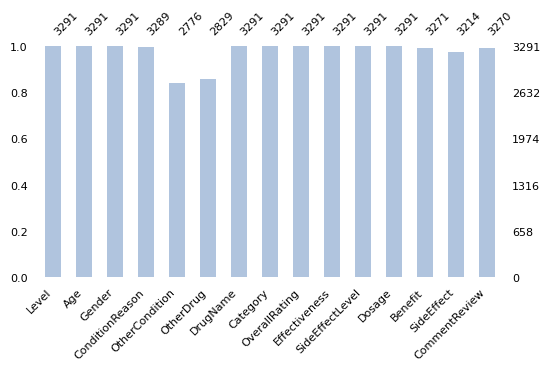

In [ ]:
msno.bar(drugs_rating, figsize=(6, 3), fontsize=8, color='lightsteelblue')
plt.show()

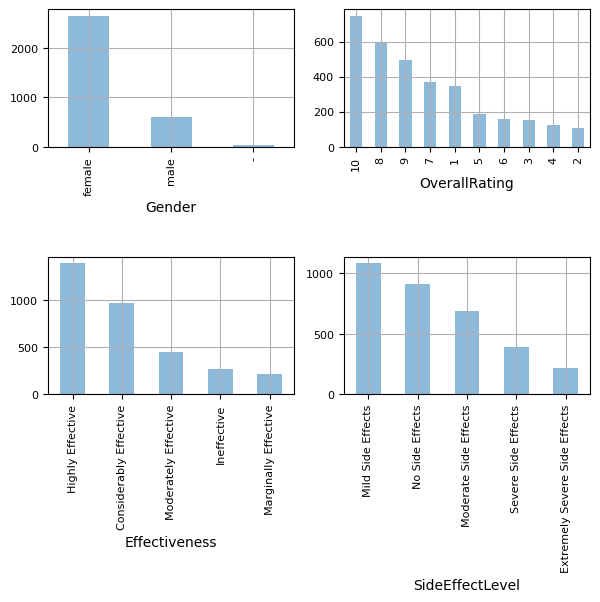

In [ ]:
row, col = 2, 2
fig, axes = plt.subplots(nrows=row, ncols=col)
plt.subplots_adjust(hspace=0.8)

columns = ['Gender', 'OverallRating', 'Effectiveness', 'SideEffectLevel']
for r in range(axes.shape[0]):
    for c in range(axes.shape[1]):
        drugs_rating[columns[r*row + c]].value_counts().plot.bar(alpha=0.5,
                                                                 figsize=(7, 5), grid=True,
                                                                 ax=axes[r, c], fontsize=8)

In [ ]:
missing_per = drugs_rating[drugs_rating.Gender == '-']

In [ ]:
df = drugs_rating[drugs_rating.Gender != '-']

In [ ]:
df = df[(df.ConditionReason.notna()) & (df.ConditionReason != '2')]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.fillna({'OtherCondition': 'None'}, inplace=True)
df.fillna({'OtherDrug': 'None'}, inplace=True)

### Cleaning text

In [ ]:
import re
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def find_punctuation(df, column, punct=punctuation):
    punt_list = []
    for i,  s in enumerate(df[column].values):
        for p in punctuation:
            if p in s and p not in punt_list:
                punt_list.append(p)
    return punt_list

In [ ]:
condition_punct = find_punctuation(df, 'ConditionReason')
other_punct = find_punctuation(df, 'OtherCondition')

In [ ]:
print(condition_punct)
print(other_punct)
set(condition_punct).issuperset(set(other_punct))

[';', '/', '-', "'", '(', ')', '.', '&', '?', '<', ':', '\\', '+', '"', '!']
[';', '-', '.', '&', "'", '/', '(', ')', '!', ':', '?', '\\', '+']


True

### All punctuation used in the Conditions is superset of the other conditions

In [ ]:
def replace_dash(text):
    res = re.sub(r"( -- )|( - )", ",", text)
    return res

In [ ]:
def remove_dash(text):
    res = re.sub(r"(- )|( -)|(-)", ",", text)
    return res

In [ ]:
def replace_punct(text, punct=';:&/+'):
    text = text.replace('\\', ',')
    res = re.sub(f"[{punct}]", ',', text)
    return res

In [ ]:
def remove_punct(text, punct='!."<?'):
    res = re.sub(f"[{punct}]", '', text)
    return res

In [ ]:
def clean_text(text):
    text = remove_punct(text)
    text = replace_punct(text)
    text = replace_dash(text)
    text = remove_dash(text)
    res = text.split(',')
    res = [c.strip() for c in res]
    return res

In [ ]:
def remove_brackets(text):
    res = re.sub(r"[\[\]]", '', text)
    return res

Clean Columns

## Chat GPT - API

In [ ]:
from openai import OpenAI
from mygpt_key import mykey

client = OpenAI(
    api_key=mykey)

In [ ]:
# define the models
gpt35 = 'gpt-3.5-turbo-0125'
gpt4 = 'gpt-4-0125-preview'

In [ ]:
def get_completion(prompt, model=gpt35):
    message = [{'role': 'user', 'content': prompt}]
    response = client.chat.completions.create(model=model,
                                              messages=message, temperature=0)
    return response.choices[0].message.content

### Processing with GPT

Chat GPT has limitation of token to process, it is recommended to process the text in chuncks. The functions below are esigne to format the output of GPT4, and processes condition using ranges and alternative queuing the nex request if using a for look with only a few requests.
Alternative for efficency a while loop can be used to extract text to proces instaces in chuncks and prevent GPT$ no producing an output for the request.

In [ ]:
import time
from datetime import datetime
import pickle

In [ ]:
def process_conditions(cond_list, rng1, rng2, inter=200):
    conditions = cond_list[rng1:rng2]
    out = extract_conditions_with_gpt(conditions, inter)
    out = out.replace(f'\n{inter}', '')
    out = out[1:-1].replace('], [', ';')
    out = remove_punct(out, punct="'")
    out = remove_punct(out, punct='"')
    out = remove_brackets(out)
    return out.split(';')

In [ ]:
def get_all_conditions(text_conditions, index_list, inter=200):
    extract_dict = {}
    for tup in index_list:
        cond = process_conditions(text_conditions, tup[0], tup[1], inter)
        extract_dict[tup] = cond
    return extract_dict

In [ ]:
def get_all_queue_conditions(text_conditions, index_list, sleep=60,\
                             prints=False, inter=200):
    extract_dict = {}
    for tup in index_list:
        now = datetime.now()
        # Prevent exceeding the max tokens or requests per minute
        time.sleep(sleep)
        cond = process_conditions(text_conditions, tup[0], tup[1], inter=inter)
        extract_dict[tup] = cond
        if prints:
            print(f'Processed {tup} health conditions')
    return extract_dict

In [ ]:
def pickle_file(fname=None, data_dict=None):
    pickled_file = open(f'{fname}.pkl', 'wb')
    pickle.dump(data_dict, pickled_file)
    pickled_file.close()


def read_pickle(fname=None):
    file_to_read = open(f'{fname}.pkl', 'rb')
    return pickle.load(file_to_read)

## Extract health conditions using GPT4


**Columns**

---

- ConditionReason
- OtherCondition
  
---


In [ ]:
health_conditions = [clean_text(c) for  c in df.ConditionReason.values]

### Create the prompt to extract health condition

In [ ]:
def extract_conditions_with_gpt(data):
    prompt = f"""
    You will be given a list a text from a clinical dabase.\
    Your task is to extract medical conditions from the text delimited in triple\
    inverted commas. You must generate a new text only with the health coditions
    found
    Input : ```{data}```

    Follow the steps below:
    1. Proofread and correct any misspellings in the text.
    2. Extract all health conditions including illnesses, diseases,\
    disorders, syndromes, medical terms, symptoms or abbreviations.\
    3. If no health condition(s) are found output the text 'None'
    4. If health conditions are found generate a new text with the extracted health
    condition(s) in written consistent medical terminology. Separate each of\
    the condition found with commas as per the example: Example conditions \
    'ADHD', 'Anxiety'
    Your output must be consistently formatted
    Do not print the input
    Do not output the word Output
    Do not output '\n'

    """
    return prompt

In [ ]:
def conditions_to_list(text):
    out = text.replace(f'```', '')
    out = remove_punct(out, punct="'")
    out = remove_punct(out, punct='"')
    out = remove_brackets(out)
    return out.split(', ')

In [ ]:
inst = 500
indexes = [i for i in range(df.shape[0])[0:df.shape[0]:inst]]
print(indexes)

[0, 500, 1000, 1500, 2000, 2500, 3000]


In [ ]:
def get_conditions(start=indexes[0], range=indexes[1], data=health_conditions,
                   model=gpt4):
    medical_dict = {}
    c = start
    while c < range:
        prompt = extract_conditions_with_gpt(data[c])
        result = get_completion(prompt, model)
        result_list = conditions_to_list(result)
        medical_dict[c] = result_list
        c += 1
    return medical_dict

In [ ]:
medical_extract = get_conditions(start=indexes[0], range=indexes[1])

In [ ]:
medical_extract_02 = get_conditions(start=indexes[1], range=indexes[2])

In [ ]:
medical_extract_03 = get_conditions(start=indexes[2], range=indexes[3])

In [ ]:
medical_extract_04 = get_conditions(start=indexes[3], range=indexes[4])

In [ ]:
medical_extract_05 = get_conditions(start=indexes[4], range=indexes[5])

In [ ]:
medical_extract_06 = get_conditions(start=indexes[5], range=indexes[6])

In [ ]:
medical_extract_07 = get_conditions(start=indexes[6], range=df.shape[0])

In [ ]:
medical_extract.update(medical_extract_02)
medical_extract.update(medical_extract_03)
medical_extract.update(medical_extract_04)
medical_extract.update(medical_extract_05)
medical_extract.update(medical_extract_06)
medical_extract.update(medical_extract_07)

In [ ]:
print(len(medical_extract.values()))
print(len(medical_extract.keys()))

3260
3260


In [ ]:
# save the processed text
pickle_file(fname='extracted_conditions', data_dict=medical_extract)

In [ ]:
other_health = [clean_text(c) for c in df.OtherCondition.values]

In [ ]:
other_cond = get_conditions(start=indexes[0], range=indexes[1],
                            data=other_health)

In [ ]:
other_cond_02 = get_conditions(start=indexes[1], range=indexes[2],
                               data=other_health)

In [ ]:
other_cond_03 = get_conditions(start=indexes[2], range=indexes[3],
                               data=other_health)

In [ ]:
other_cond_04 = get_conditions(start=indexes[3], range=indexes[4],
                               data=other_health)

In [ ]:
other_cond_05 = get_conditions(start=indexes[4], range=indexes[5],
                               data=other_health)

In [ ]:
other_cond_06 = get_conditions(start=indexes[5], range=indexes[6],
                               data=other_health)

In [ ]:
other_cond_07 = get_conditions(start=indexes[6], range=df.shape[0],
                               data=other_health)

In [ ]:
other_cond.update(other_cond_02)
other_cond.update(other_cond_03)
other_cond.update(other_cond_04)
other_cond.update(other_cond_05)
other_cond.update(other_cond_06)
other_cond.update(other_cond_07)

In [ ]:
print(len(other_cond))

3260


In [ ]:
pickle_file(fname='other_extracted', data_dict=other_cond)

## Clean medication names

**Columns**

---
- DrugName
- OtherDrug

---

The DrugName do not require extraction, only punctuation and the commercial name in parentheis will be removed to shorten the drug name and for counts.

### DrugName

In [ ]:
df.DrugName.value_counts()

DrugName
Lexapro (Escitalopram)              73
Paxil (Paroxetine)                  57
Retin-A (Tretinoin Topical)         53
Synthroid (Levothyroxine)           52
Prozac (Fluoxetine)                 50
                                    ..
Betaseron (Interferon Beta-1B)       1
Ribavirin                            1
Rebif (Interferon Beta-1A)           1
Exelon (Rivastigmine)                1
Spiriva (Tiotropium Inhalation)      1
Name: count, Length: 233, dtype: int64

In [ ]:
drugs_name = df.DrugName.values

In [ ]:
DrugName = []
for name in df.DrugName.values:
    if '(' in name:
        res = re.findall(r'\(.*?\)', name)
        res = re.sub(r"[\(\)]", '', res[0])
        res = res.replace(' / ', '/')
        DrugName.append(res)
    else:
        DrugName.append(name)

In [ ]:
df.DrugName = DrugName

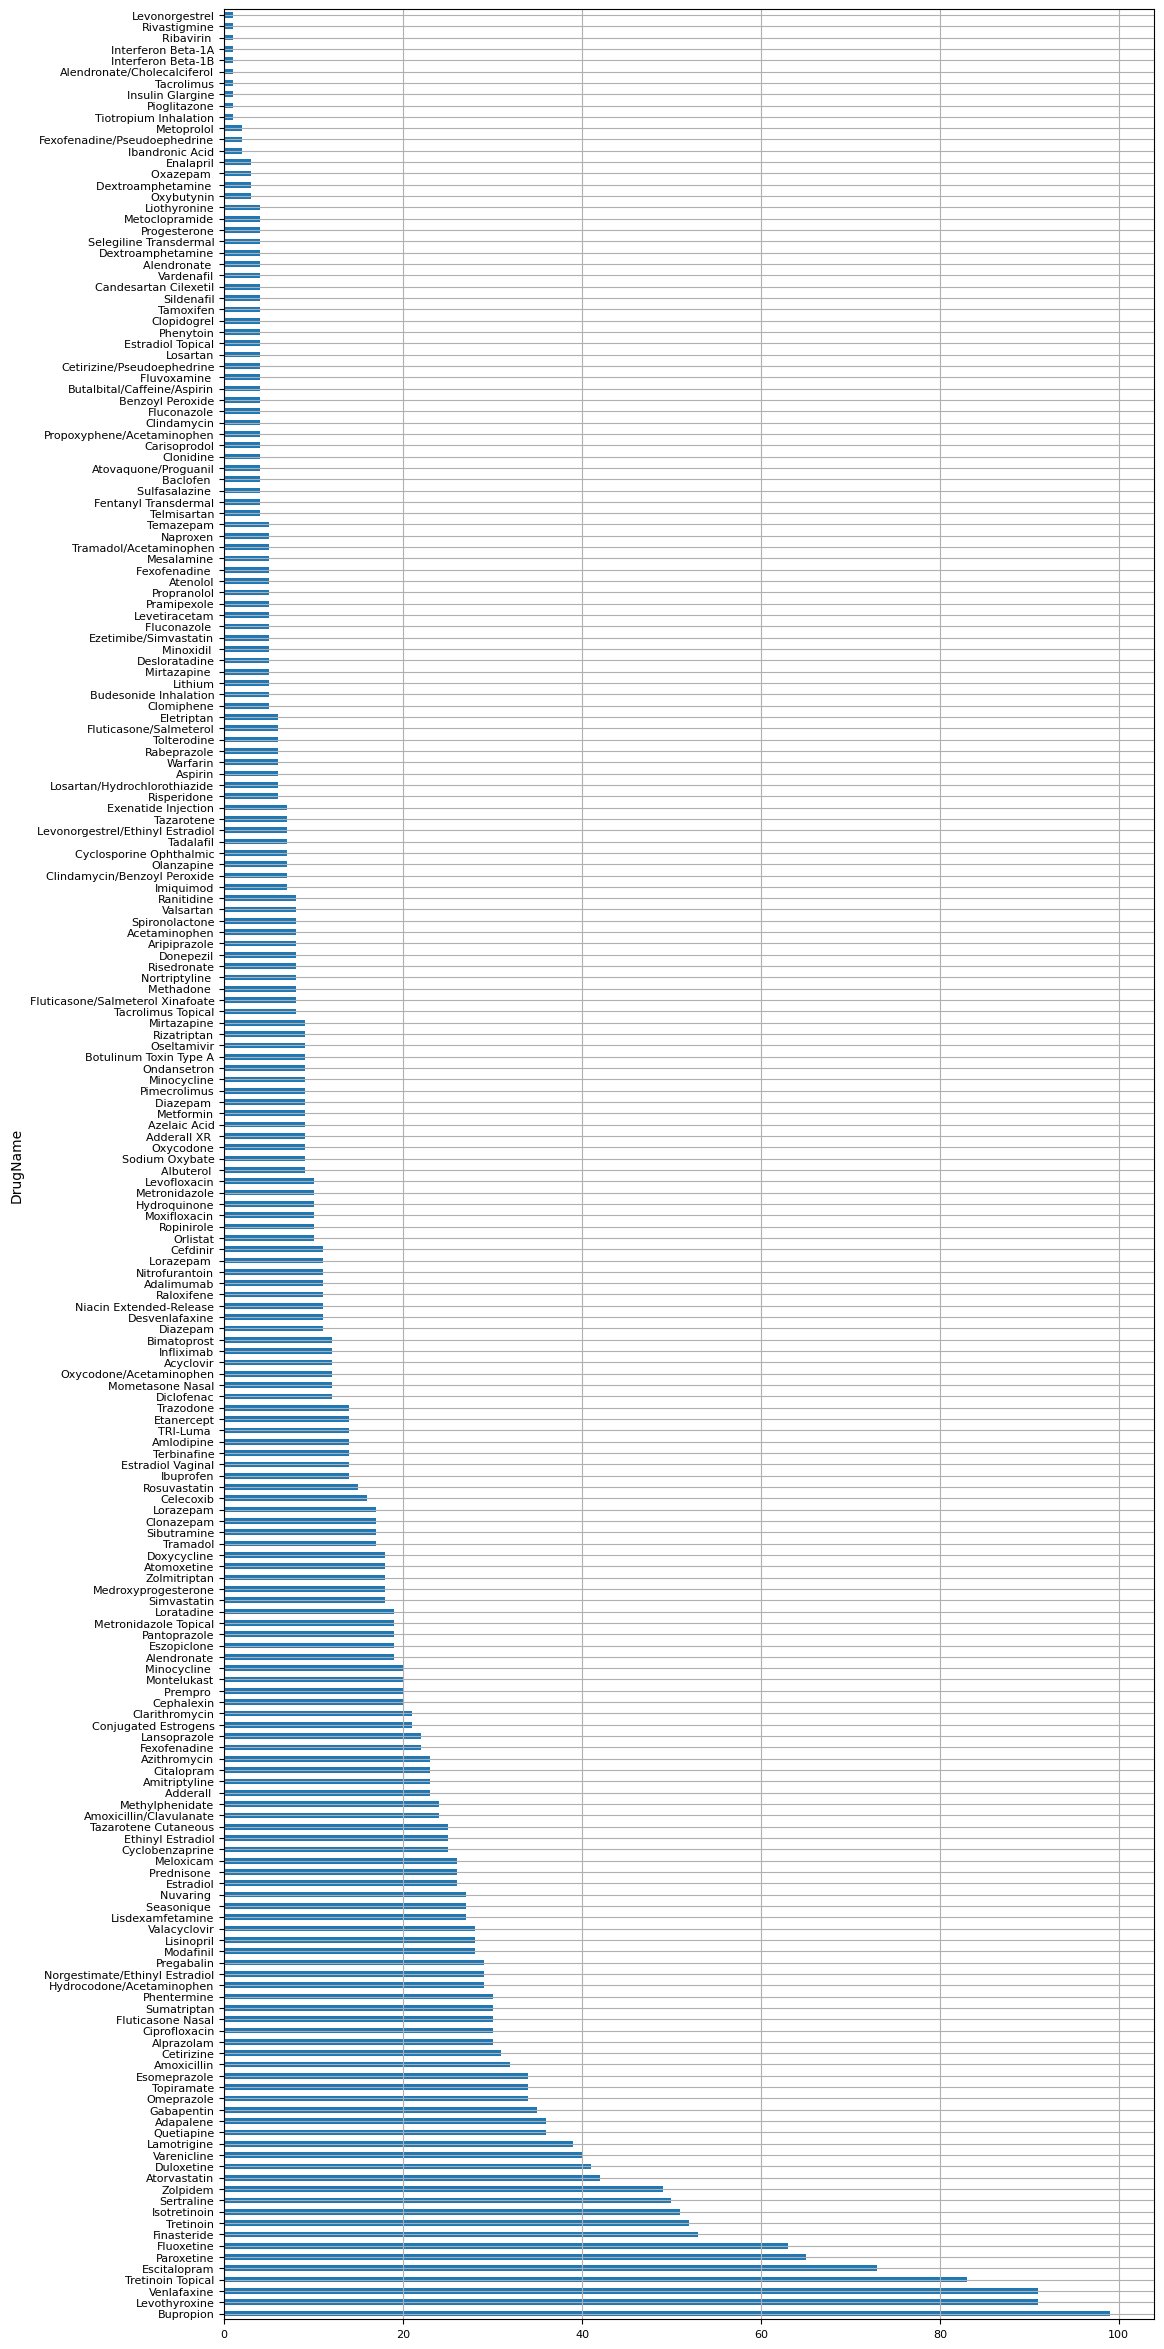

In [ ]:
df.DrugName.value_counts().plot.barh(figsize=(12, 30), fontsize=8, grid=True)
plt.show()

In [ ]:
# save the data modifications
pickle_file('DrugName', df.DrugName)

### OtherDrug

This column have contains commercial and chemical names of medications and also have general informataion about the type of medication taken rather than the chemical or commercial name.

Before extracting make a copy of the column OtherDrug raw data.

The approaches to extract the text that contains information about drug name or kind of drug are as follows:

---

#### Extraction - Mixed approach
----
1. Lower the text case
2. Clean the strings removing unnecessary punctuation
3. Find any raw of the dataframe with none, nil, no, empty space or similar meaning and replace them with none
4. Remove words with duplicate meaning: for instance, if blood pressure, high blood pressure or hypertension appears in the test only use one of them since the three words represent the same illness/condition.
5. Mask the instances that only contain none from the dataset
6. Instantiate the Med7 NER transformer and spaCy NER BC5CDR
7. Create a function that:
   - Extract all entities with the label 'DRUG' model Med7(last updated in 2023)
   - If no drugs were identified in the text process the text using the NER BC5CDR model
8. Create a prompt and function to extract the medications using generative AI Chat-GPT4
9. Once all text from the dataset has been processed by the two models, extract the drugs entities of any instances without detections using the GPT4 function.
10. If there are left instances without drug names, verify if they have misspelling errors using the databases below. If misspelling errors are found then correct with the appropiate name from the databases.
- https://www.drugs.com/
- https://go.drugbank.com/drugs/DB00476


---

#### Extraction - GPT4 Only
---

Use the ChatGPT function to extract the drugs from the raw data (copy of column before processing).

In [ ]:
OtherDrug_copy = df.OtherDrug.values

In [ ]:
df.OtherDrug = df.OtherDrug.str.lower()
df.OtherDrug = df.OtherDrug.apply(lambda x: x.strip())
df.OtherDrug = df.OtherDrug.apply(remove_punct)

In [ ]:
df.OtherDrug.value_counts()

OtherDrug
none                           1632
synthroid                        23
birth control                    22
wellbutrin                       19
zoloft                           15
                               ... 
ritalin; birth control pill       1
zetia and lexapro                 1
pristiq                           1
hydrocortisone                    1
inderal for migraine              1
Name: count, Length: 1199, dtype: int64

In [ ]:
none = df['OtherDrug'][(df.OtherDrug.str.lower().str.contains('none')) |
                        (df.OtherDrug.str.lower().str.contains('nil')) |
                        (df.OtherDrug.str.lower().str.contains('no'))].unique()

In [ ]:
replace_none = [n for n in none if len(n) <= 6]

In [ ]:
replace_none.remove('none')

In [ ]:
df.OtherDrug.replace(replace_none, 'none', inplace=True)

In [ ]:
df['OtherDrug'][(df.OtherDrug.str.lower().str.contains('no other'))]

92                 no other drugs
793          no other drugs taken
977      no other drugs right now
1075               no other drugs
1126               no other drugs
2321    no other drugs but on hrt
3042         no other medications
3122               no other drugs
Name: OtherDrug, dtype: object

In [ ]:
df.OtherDrug.iloc[2321] = 'hrt'

In [ ]:
no_other = list(df['OtherDrug'][(df.OtherDrug.str.contains('no other')) | (
    df.OtherDrug.str.contains('nil at', case=False))])

In [ ]:
df.OtherDrug.replace(no_other, 'none', inplace=True)

In [ ]:
df.OtherDrug[df.OtherDrug.str.len() <= 2].unique()

array(['-', 'na', '', '0'], dtype=object)

In [ ]:
df.OtherDrug[df.OtherDrug.str.len() <= 4].unique()

array(['none', 'hrt', 'many', 'mvi', 'hctz', '-', 'yaz', 'misc', 'na',
       'azee', '', 'maoi', 'hzt', 'n/a', '0'], dtype=object)

In [ ]:
replace_na = list(df.OtherDrug[df.OtherDrug.str.len() <= 2].unique())
replace_na.append('n/a')
replace_na

['-', 'na', '', '0', 'n/a']

In [ ]:
df.OtherDrug.replace(replace_na, 'none', inplace=True)

In [ ]:
df.OtherDrug.value_counts()

OtherDrug
none                           1680
synthroid                        23
birth control                    22
wellbutrin                       19
zoloft                           15
                               ... 
nuvaring wellbutrin               1
difflucan cream                   1
marinol                           1
prednisone; cipro; levaquin       1
inderal for migraine              1
Name: count, Length: 1183, dtype: int64

In [ ]:
df[['DrugName', 'OtherDrug']][(df.OtherDrug.str.contains('none')) & (df.OtherDrug != 'none')]

,DrugName,OtherDrug
227,Venlafaxine,none birth control
495,Diazepam,at first none; later rivotril 2 mg at night
597,Loratadine,none at that time
628,Lorazepam,none at the time of taking ativan
676,Ondansetron,none at this time
973,Fluconazole,none while on the recommended dose
1018,Lansoprazole,none related
1216,Esomeprazole,none (only ibuprofen for pain)
1275,Pantoprazole,none; execept for strong antibiotics occasiona...
1545,Levothyroxine,currently plavix; lipitor; none 15 yrs ago


In [ ]:
# Hard coding
df.OtherDrug.loc[227] = 'contraception'
df.OtherDrug.loc[1216] = 'ibuprofen'
df.OtherDrug.loc[628] = 'activin'
df.OtherDrug.loc[2404] = 'vitamins'
df.OtherDrug.loc[2464] = 'depot antipsychotic'
df.OtherDrug.loc[3108] = 'sleeping pills and tylenol'

In [ ]:
other_none = list(df.OtherDrug[df.OtherDrug.str.lower().str.contains('none ')])[0:-1]
other_none

['none at that time',
 'none at this time',
 'none while on the recommended dose',
 'none related',
 'currently plavix; lipitor; none 15 yrs ago',
 'none for these conditions',
 'none at the time',
 'none regularly',
 'none at the time',
 'none for this particular problem  weight loss']

In [ ]:
other_none.remove('currently plavix; lipitor; none 15 yrs ago')

In [ ]:
df.OtherDrug.replace(other_none, 'none', inplace=True)

In [ ]:
nothing = list(df.OtherDrug[df.OtherDrug.str.lower().str.contains('nothing')])
nothing

['nothing else',
 'nothing',
 'nothing',
 'nothing else',
 'nothing',
 'nothing',
 'nothing',
 'nothing',
 'nothing regularly',
 'nothing else',
 'nothing',
 'nothing']

In [ ]:
df.OtherDrug.replace(nothing, 'none', inplace=True)

In [ ]:
multiple = df.OtherDrug[(df.OtherDrug.str.contains('many')) |
    (df.OtherDrug.str.contains('diverse')) | (df.OtherDrug.str.contains('numerous'))]
multiple

155                      too many to list here
318                                   numerous
400                        hospital tried many
423                                       many
513     too numerous to mention; but took many
2490                          too many to list
2939                                      many
Name: OtherDrug, dtype: object

In [ ]:
df.OtherDrug.iloc[multiple.index] = 'multiple medications'

### Birth control

In [ ]:
# Find birth control
birth_idx = df.OtherDrug[(df.OtherDrug == 'birth control') |
                         (df.OtherDrug == 'birthcontrol')].index

In [ ]:
df.OtherDrug.iloc[birth_idx] = 'contraception'

In [ ]:
df.OtherDrug[(df.OtherDrug.str.contains('birth control')) & (~df.OtherDrug.str.startswith('birth'))]

230                   lorazapam; reclipsen(birth control)
606                                    only birth control
1000                         modicon (birth control pill)
1065                             just birth control pills
1070                              synthroid;birth control
1096                                   oral birth control
1118                          ritalin; birth control pill
1156                             zyrtec and birth control
1589                  benadryl; aleve birth control pills
1637                            lexapro and birth control
1638                            lexapro and birth control
1639                            lexapro and birth control
1641                            lexapro and birth control
1647                            lexapro and birth control
1692                              nortrel (birth control)
1696    none; other than birth control but now lyrica ...
1832    qvar; albuterol inhalers; birth control pills;...
1986          

In [ ]:
birth_idx_02 = df.OtherDrug[(df.OtherDrug.str.contains('birth control')) &
               (~df.OtherDrug.str.startswith('birth'))].index

In [ ]:
birth_control_list = ['birth control pills', 'birth control pill', 'birth control']

for idx in birth_idx_02:
    for bc in birth_control_list:
        if bc in df.OtherDrug.iloc[idx]:
            df.OtherDrug.iloc[idx] = df.OtherDrug.iloc[idx].replace(bc, 'contraception')

In [ ]:
for b in birth_control_list:
    df.OtherDrug = df.OtherDrug.str.replace(b, 'contraception', regex=True)

In [ ]:
contraceptive = df.OtherDrug[df.OtherDrug.str.contains('contraceptiv', case=False)].unique()
contraceptive

array(['oral contraceptives; nasalchrom', 'contraceptive pill',
       'oral contraceptive', 'low dose oral contraceptives',
       'contraceptives min-ovral', 'oral contraceptive (marvelon)'],
      dtype=object)

In [ ]:
contraceptive_ = ['oral contraceptives', 'oral contraceptive'] + list(contraceptive[[1, 2, 3]])

In [ ]:
for c in contraceptive_:
    df.OtherDrug = df.OtherDrug.str.replace(c, 'contraception', regex=True)

In [ ]:
df.OtherDrug[df.OtherDrug.str.contains('pill', case=False)]

275          wellbutrion; b/c pill
455            benicar; quintrpill
1100               yaz; water pill
1401        the pill; depo-provera
2863     occasional sleeping pills
3108    sleeping pills and tylenol
Name: OtherDrug, dtype: object

In [ ]:
df.OtherDrug.iloc[275] = df.OtherDrug.iloc[275].replace('b/c pill', 'contraception')
df.OtherDrug.iloc[1401] = df.OtherDrug.iloc[1401].replace('the pill', 'contraception')

### Painkillers

In [ ]:
df.OtherDrug[df.OtherDrug.str.contains('pain relie') | df.OtherDrug.str.contains('pain k') |
     df.OtherDrug.str.contains('paink')]

164                          otc pain relief
376                              painkillers
1035           pain reliever; muscle relaxer
2268    pain killers such as naproxen sodium
2293           occasional otc pain relievers
2463                      otc pain relievers
Name: OtherDrug, dtype: object

In [ ]:
pain_arr = df.OtherDrug[df.OtherDrug.str.contains('pain relie') | df.OtherDrug.str.contains('pain k') |
     df.OtherDrug.str.contains('paink')]

In [ ]:
df.OtherDrug.iloc[pain_arr.index[[0, 2, 4, 5]]] = 'painkillers'

In [ ]:
df.OtherDrug.iloc[2268] = df.OtherDrug.iloc[2268].replace('pain killers',
                                                          'painkillers')

### Hypertension

In [ ]:
df.OtherDrug[df.OtherDrug.str.contains('hyperte') | df.OtherDrug.str.contains('blood pressure')]

84                             blood pressure and lipitor
440                                     hypertension meds
731         high blood pressure; high cholestrol; anxiety
1188    norco; methodone; blood pressure medicine;  pl...
1227                                  high blood pressure
2065                       high blood pressure medication
2108                             blood pressure; hormones
2294                         high blood pressure medicine
2601                                  blood pressure meds
2782                hypertensive medication; otc vitamins
Name: OtherDrug, dtype: object

In [ ]:
hypertension = df.OtherDrug[df.OtherDrug.str.contains('hyperte') |
                 df.OtherDrug.str.contains('blood pressure')].index
hypertension[[1, 4, 5, 7, 8]]

Index([440, 1227, 2065, 2294, 2601], dtype='int64')

In [ ]:
df.OtherDrug.iloc[hypertension[[1, 4, 5, 7, 8]]] = 'hypertension medication'

In [ ]:
other_hypertension = ['high blood pressure', 'blood pressure', \
                      'hypertensive medication', 'blood pressure meds']

In [ ]:
for hyp in other_hypertension:
    df.OtherDrug = df.OtherDrug.str.replace(hyp, 'hypertension medication',
                                            regex=True)

In [ ]:
df.OtherDrug[df.OtherDrug.str.contains('hyperte') | df.OtherDrug.str.contains('blood pressure')]

84                    hypertension medication and lipitor
440                               hypertension medication
731     hypertension medication; high cholestrol; anxiety
1188    norco; methodone; hypertension medication medi...
1227                              hypertension medication
2065                              hypertension medication
2108                    hypertension medication; hormones
2294                              hypertension medication
2601                              hypertension medication
2782                hypertension medication; otc vitamins
Name: OtherDrug, dtype: object

### Hormone replacement therapy

In [ ]:
df.OtherDrug[df.OtherDrug.str.contains('hrt') | df.OtherDrug.str.contains('hormone repla')]

99                                              hrt
150                             hormone replacement
410                                             hrt
436                     hormone replacement therapy
488                                             hrt
1500                                            hrt
1546                    hormone replacement therapy
1593    hormone replacement therapy (natural cream)
1731                                            hrt
2125                                            hrt
2321                                            hrt
2604                           fosomax; hrt; zoloft
2876                            hormone replacement
2988                           hormone replacements
Name: OtherDrug, dtype: object

In [ ]:
hrt_index = df.OtherDrug[df.OtherDrug.str.contains('hrt') | df.OtherDrug.str.contains('hormone repla')].index

In [ ]:
hrt_index = list(hrt_index)
hrt_index.remove(2604)
hrt_index

[99, 150, 410, 436, 488, 1500, 1546, 1593, 1731, 2125, 2321, 2876, 2988]

In [ ]:
df.OtherDrug.iloc[hrt_index] = 'hormone replacement therapy'

In [ ]:
df.OtherDrug.iloc[2604] = df.OtherDrug.iloc[2604].replace('hrt', 'hormone replacement therapy')

In [ ]:
df.OtherDrug[df.OtherDrug.str.contains('hormones') | df.OtherDrug.str.contains('hormone')]

99                            hormone replacement therapy
150                           hormone replacement therapy
410                           hormone replacement therapy
436                           hormone replacement therapy
488                           hormone replacement therapy
813     contraception; chemotherapy; synthetic thyroid...
1137                                bioidentical hormones
1500                          hormone replacement therapy
1546                          hormone replacement therapy
1593                          hormone replacement therapy
1731                          hormone replacement therapy
1741                           mirena (iud with hormones)
2108                    hypertension medication; hormones
2125                          hormone replacement therapy
2321                          hormone replacement therapy
2334                                         bio-hormones
2547                  vitamins; synthroid thyroid hormone
2604         f

In [ ]:
df.OtherDrug[df.OtherDrug.str.contains('anti-') | df.OtherDrug.str.contains('anti ')]

368                                     anti seizure meds
391     lidoderm patches; methocarbanol; methodone; an...
687                                       anti-depressant
723                              later given an anti acid
859           vitamins ibuprofen mucinex anti depresssant
1376                lamitrogine (anti-seizure medication)
1426                                     anti depressants
2528                  zoloft; ptu (anti-thyroid medicine)
2753                              an anti inflmatory drug
2757                             an anti inflamatory drug
Name: OtherDrug, dtype: object

In [ ]:
df.OtherDrug = df.OtherDrug.str.replace('anti ', 'anti-', regex=True)

In [ ]:
df.OtherDrug[~df.OtherDrug.str.contains('medication') & df.OtherDrug.str.contains('med') &
            ~df.OtherDrug.str.contains('medicine')]

16       lipitor; verapamil; over the counter allergy med
368                                     anti-seizure meds
430     tried cymbalta; zoloft; paxil; tramadol; and a...
444                       cymbalta; thyroid meds;lamictal
535                                       cholesterol med
634                          abilify; medidate; strattera
658                               asthma maintenance meds
906                   allergy med/ loratadine 10 mg daily
2295                                  demedex & potassium
2449             depakote; zoloft; wellbutrin; heart meds
2451                    pain meds thyroid estrace topamax
2811                                 3 blood pressur meds
2970           only multiple vitamins and otc medicatinos
Name: OtherDrug, dtype: object

In [ ]:
df.OtherDrug.iloc[2970] = df.OtherDrug.iloc[2970].replace('medicatinos', 'medication')

In [ ]:
df.loc[2811, 'OtherDrug'] = 'hypertension medication'

### Medication

In [ ]:
meds = df.OtherDrug[~df.OtherDrug.str.contains('medication') &
            df.OtherDrug.str.contains('meds')].index

In [ ]:
meds_correct = [df.OtherDrug.iloc[idx].replace('meds', 'medication') for idx in meds]
df.OtherDrug.iloc[meds] = meds_correct

In [ ]:
med = df.OtherDrug[~df.OtherDrug.str.contains('medication') &
                   df.OtherDrug.str.contains('med') &
                   ~df.OtherDrug.str.contains('medi') &
                   ~df.OtherDrug.str.contains('mede')].index

In [ ]:
df.OtherDrug.iloc[med]

16     lipitor; verapamil; over the counter allergy med
535                                     cholesterol med
906                 allergy med/ loratadine 10 mg daily
Name: OtherDrug, dtype: object

In [ ]:
med_correct = [df.OtherDrug.iloc[idx].replace('med', 'medication')
               for idx in med]
df.OtherDrug.iloc[med] = med_correct

In [ ]:
punct = ';:&/+'

In [ ]:
def replace_dashes(text):
    dash_list = ["--", " - ", " -- ", "- ", " -"]
    for dash in dash_list:
        if dash in text:
            text = re.sub(f"{dash}", ",", text)
    return text

### Mixed Approch NER + GPT4 + Manual Input

In [ ]:
df.OtherDrug = df.OtherDrug.apply(lambda x: x.strip())

In [ ]:
df.to_csv('clean_drugs.csv')

In [ ]:
df.OtherDrug.value_counts()

OtherDrug
none                           1701
contraception                    43
synthroid                        23
wellbutrin                       19
zoloft                           15
                               ... 
nuvaring wellbutrin               1
difflucan cream                   1
marinol                           1
prednisone; cipro; levaquin       1
inderal for migraine              1
Name: count, Length: 1146, dtype: int64

In [ ]:
process_indexes = df.OtherDrug[(df.OtherDrug != 'none') &
        (df.OtherDrug != 'contraception') & (df.OtherDrug !=
                                             'multiple medications') &
        (df.OtherDrug != 'painkillers')].index

In [ ]:
other_drugs = [replace_dashes(replace_punct(text)) for text in df.OtherDrug.iloc[process_indexes].values]

In [ ]:
import spacy

In [ ]:
med7 = spacy.load('en_core_med7_trf')

In [ ]:
bc5cdr = spacy.load('en_ner_bc5cdr_md')

In [ ]:
spacy.__version__

'3.4.4'

In [ ]:
# Define colours for  each of the seven labels of thsi model
# https://huggingface.co/kormilitzin/en_core_med7_trf
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

In [ ]:
other_drugs[0:5]

['epilium',
 'lansoprazole, loestrin 30',
 'tranxene, k-tabs',
 'triquilar',
 'wellbutrin']

In [ ]:
text = other_drugs[2]
doc = med7(text)

In [ ]:
# visulise one example
spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

In [ ]:
print(f'Other Drugs used by the patient: {doc.ents[0]}, {doc.ents[1]}')

Other Drugs used by the patient: tranxene, k-tabs


In [ ]:
def ner_spacy_model(text, entity=None, model=med7):
    if entity is None:
        entity = ['DRUG', 'CHEMICAL']
    output = model(text)
    entities = [ent.text for ent in output.ents if ent.label_ in entity]
    return entities

In [ ]:
out = ner_spacy_model(text)
print(out)

['tranxene', 'k-tabs']


In [ ]:
def extract_drugs(text_list, model_01=med7, model_02=bc5cdr,
                  entities=None, prints=True):
    if entities is None:
        entities = ['DRUG', 'CHEMICAL']
    drugs = []
    misses_index = []
    count_01 = 0
    count_02 = 0
    count_03 = 0
    for idx, text in enumerate(text_list):
        output = ner_spacy_model(text, entity=entities, model=model_01)
        if len(output) == 0:
            count_01 += 1
            # Uses bc5 NER model to identify the chemical compound or formulations - DRUG
            output = ner_spacy_model(text, entity=entities, model=model_02)
            if len(output) >= 1:
                drugs.append(output)
                count_02 += 1
            else:
                # This instance can be further reviewed for misspelling in and
                # processes using generative AI where applicable
                drugs.append(['none'])
                misses_index.append(idx)
                count_03 += 1
        else:
            drugs.append(output)
    if prints:
        print(f'Model 1 did not find other medications used by {count_01} patients')
        print(f'Model 2 identified other medications used by {count_02} patients missed by model 1')
        print(f'The two models did not find other drugs used in {count_03} patients')

    return drugs, misses_index

In [ ]:
OtherDrug, misses = extract_drugs(other_drugs)

Model 1 did not find other medications used by 187 patients
Model 2 identified other medications used by 44 patients missed by model 1
The two models did not find other drugs used in 143 patients


In [ ]:
other_drug_dict = dict(zip(process_indexes, OtherDrug))
pickle_file(fname='OtherDrug', data_dict=other_drug_dict)

Med 7 and Models need context to be able to be more accurate
adding a word can increment the entity recogition
but also can introduce incorrect predition bias
In the example below the text other drugs
was added and the model detects epilium  as drug
The name of this drug is mispell - epilim
the text need to be clen, corrected.
For DF the will be accurate, balance

In [ ]:
text_01 = other_drugs[0]
text_02 = f'Other drug: {other_drugs[0]}'
doc_01 = med7(text_01)
doc_02 = med7(text_02)
spacy.displacy.render(doc_01, style='ent', jupyter=True, options=options)
spacy.displacy.render(doc_02, style='ent', jupyter=True, options=options)

In [ ]:
TextList = [text_01, text_02]
for text in TextList:
    entities = ner_spacy_model(text_01, entity=['CHEMICAL'], model=bc5cdr)
    print(entities)

[]
[]


#### Extract with generative AI

In [ ]:
def extract_medications_with_gpt(data):
    prompt = f"""
    You will be given a text from a clinical database.
    Your task is to extract medical drugs including
    treatments, therapy or contraception from the text delimited in triple\
    inverted commas. You must generate a new text only\
    with information extracted.
    Input : ```{data}```

    Follow the steps below:
    1. Proofread and correct any misspelt medications, treatments,
    therapy, antibiotics names or contraception in the text.
    2. Extract all medications including medical prescriptions drug names, medical therapy,
    treatment, antibiotics or medical drugs for sickness, illness and pain.\
    Include also any treatment abbreviation and or medication type.
    Do not output the dosage or intake frequency.
    3. Verify that extracted medication exist
    4. If no medication is found output the word 'none'
    Do not out the input
    Do not output the word Output
    Do not output '\n'
    Do output the extracted health medications
    """
    return prompt

In [ ]:
def get_other_drug(start=indexes[0], range=indexes[1], data=health_conditions,
                   model=gpt4):
    medical_dict = {}
    c = start
    while c < range:
        prompt = extract_medications_with_gpt(data[c])
        result = get_completion(prompt, model)
        result_list = conditions_to_list(result)
        medical_dict[c] = result_list
        c += 1
    return medical_dict

In [ ]:
none_ = [k for k,v in OtherDrug.items() if v ==['none']]

In [ ]:
OtherDrug_copy[none_]

array(['Epilium', 'Tamasapan', 'drugs for the above conditions',
       'Erythrom.', 'maxide', 'HRT', 'Adderall', 'Adderall', 'kapadex',
       'focalin', 'Adderall XR', 'Norflex (muscle relaxor)',
       'hormone replacement', 'concerta', 'provigil', 'provigil',
       'buspar', 'Maxalt', 'Providgil; Lunesta', 'Epilim',
       'Serevent; Singulaire', 'anti seizure meds', 'NSAIDS', 'Kadian',
       'HRT', 'hormone replacement therapy', 'CYMBALATA',
       'prescription mouth rinse', 'HRT', 'mvi', 'Boniva ',
       'oral contraceptives; nasalchrom', 'Cardizem',
       'only birth control', 'asthma maintenance meds ', 'vitamans',
       'adderall', 'Clarinase', 'clariton', 'Adderall', 'benadryl',
       'differin', 'Retin- A', 'Klaron; finacea', 'Differin', 'Adderall',
       'Provigil', 'Finacea topically', 'Low Dose Oral Contraceptives',
       'misc', 'arthotec ( misdiagnosed condition as arthritis',
       'Modicon (birth control pill)', 'gaviscon', 'Pegasis-interferon',
       'just

In [ ]:
exper = get_other_drug(start=0, range=len(none_), data=OtherDrug_copy[none_])

In [ ]:
misses_array = np.array(other_drugs)[misses]

In [ ]:
gpt4_misses = get_other_drug(start=0, range=len(misses_array), data=misses_array,
                            model=gpt4)

In [ ]:
list(gpt4_misses.items())[0:10]

[(0, ['epilim']),
 (1, ['none']),
 (2, ['none']),
 (3, ['erythromycin']),
 (4, ['Maxzide']),
 (5, ['hormone replacement therapy']),
 (6, ['Adderall']),
 (7, ['Adderall']),
 (8, ['Dexlansoprazole']),
 (9, ['Focalin'])]

In [ ]:
gpt4_idx = [k for k, v in gpt4_misses.items() if v == ['none']]

In [ ]:
print(f'GPT4 extracted {len(misses) - len(gpt4_idx)} other conditions from {len(misses)} patients')

GPT4 extracted 119 other conditions from 143 patients


In [ ]:
df_misses = pd.DataFrame(index=misses, columns=['OtherDrug', 'GPT4'], data=0)

In [ ]:
df_misses['OtherDrug'] = misses_array
df_misses['GPT4'] = gpt4_misses.values()
df_misses['Correct'] = gpt4_misses.values()

In [ ]:
df_misses.iloc[gpt4_idx[-10:]]

,OtherDrug,GPT4,Correct
817,marijuana,[none],[none]
983,contraception on 777,[none],[none]
991,hzt,[none],[none]
1333,singular,[none],[none]
1380,allergy prescriptions,[none],[none]
1439,marijuana,[none],[none]
1448,i had taken almost every acne treatment,[none],[none]
1480,"on a skin rejuvenation system, md forte",[none],[none]
1487,obagi skin care treatment,[none],[none]
1490,stri-vectin,[none],[none]


- No context given
- https://www.drugs.com/
- https://go.drugbank.com/drugs/DB00476

In [ ]:
df_misses.loc[17, 'Correct'] = ['Temazapan']
df_misses.loc[285, 'Correct'] = ['prescription mouth rinse']
df_misses.loc[298, 'Correct'] = ['MVI']
df_misses.loc[350, 'Correct'] = ['contraception']
df_misses.loc[369, 'Correct'] = ['asthma medication']
df_misses.loc[372, 'Correct'] = ['vitamins']
df_misses.loc[532, 'Correct'] = ['concentraception']
df_misses.loc[657, 'Correct'] = ['Singulair']
df_misses.loc[658, 'Correct'] = ['neurontin']
df_misses.loc[751, 'Correct'] = ['Lamictal']
df_misses.loc[916, 'Correct'] = ['contraception']
df_misses.loc[983, 'Correct'] = ['contraception']
df_misses.loc[991, 'Correct'] = ['HZT']
df_misses.loc[1333, 'Correct'] = ['Singulair']
df_misses.loc[1380, 'Correct'] = ['Allergy treatment']
df_misses.loc[1448, 'Correct'] = ['acne treatment']
df_misses.loc[1490, 'Correct'] = ['StricVectin']

In [ ]:
# save gpt4 output for the no detected instances by the NER
pickle_file(fname='gpt4_otherdrug', data_dict=gpt4_misses)

In [ ]:
# save dataframe with input GPT4 output and corrected GPT instances
df_misses.to_csv('df_model_misses.csv')

### GPT4 to extract from OtherDrug raw data

In [ ]:
gpt4_all_other = get_conditions(start=0, range=len(OtherDrug_copy), data=OtherDrug_copy,
                            model=gpt4)

In [ ]:
print(list(gpt4_all_other.items())[100:120])

[(100, ['gabapentin; Elavil']), (101, ['none']), (102, ['simvastatin; trazodone']), (103, ['Lexapro']), (104, ['Lisinopril; Vyvanse']), (105, ['Nature-Throid']), (106, ['Lescol', 'Diovan', 'Synthroid', 'Vicodin', 'Zanaflex', 'Neurontin', 'Wellbutrin']), (107, ['Klonopin']), (108, ['Ultram; Valium']), (109, ['none']), (110, ['none']), (111, ['none']), (112, ['none']), (113, ['Duragesic patch 25']), (114, ['Adderall']), (115, ['Im sorry', 'but you didnt provide any text for me to process. Could you please provide the text youd like me to analyze?']), (116, ['Synthroid']), (117, ['Metformin; Xanax']), (118, ['Adderall']), (119, ['Flexeril 10mg'])]


In [ ]:
sorry_index = [k for k, v in gpt4_all_other.items() if 'Im sorry' in v]

In [ ]:
np.array(OtherDrug_copy)[sorry_index]

array(['none', 'none', 'None', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', ' ', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'None', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'None', 'none'], dtype=object)

In [ ]:
gpt_none_idx = [k for k, v in gpt4_all_other.items() if v == ['none']]

---
GPT4 output to ```none``` input was:

<font color="orange">'Im sorry', 'but you didnt provide any text for me to process. Could you please provide the text youd like me to analyze?'</font>

To deal with this all instances with output <font color="red">I'm sorry...'</font> will be replace with ['none']

In [ ]:
sorry_to_none = {k: ['none'] for k, v in gpt4_all_other.items() if k in sorry_index}

In [ ]:
gpt4_all_other.update(sorry_to_none)

In [ ]:
gpt_process = {k: v for k, v in gpt4_all_other.items() if k in process_indexes}

In [ ]:
gpt_process_ = {k: v for k, v in extracted.GPT4.items() if k in process_indexes}

In [ ]:
pickle_file(fname='gpt4_all_otherdrug', data_dict=gpt4_all_other)
pickle_file(fname='gpt4_process', data_dict=gpt_process)

In [ ]:
none_gpt_process = [k for k, v in gpt_process.items() if v == ['none']]
none_ner = [k for k, v in OtherDrug.items() if v == ['none']]

### Models Comparison

In [ ]:
OtherDrug = read_pickle('OtherDrug')

In [ ]:
print(f'NER none: {len(none_ner)}')
print(f'GPT4 none in process_index: {len(none_gpt_process)}')

NER none: 143
GPT4 none in process_index: 70


In [ ]:
count = 0
for idx in none_gpt_process:
    if idx in none_ner:
        count +=1
        print(df.OtherDrug[idx])
print(f'Total common nones: {count}')

tamasapan
drugs for the above conditions
mvi
asthma maintenance medication
vitamans
misc
tea tree oil
singular
neuronto=in
health supplements
hzt
singular
allergy prescriptions
marijuana
on a skin rejuvenation system; md forte
stri-vectin
Total common nones: 16


In [ ]:
ner_extraction_rate = (len(OtherDrug) - len(none_ner))/len(OtherDrug)

In [ ]:
gpt4_extraction_rate = (len(OtherDrug) - len(none_gpt_process))/len(OtherDrug)

In [ ]:
print(f'NER model extraction rate: {ner_extraction_rate}')
print(f'GPT4 model extraction rate: {gpt4_extraction_rate}')

NER model extraction rate: 0.9049202127659575
GPT4 model extraction rate: 0.9534574468085106


In [ ]:
df_misses = pd.read_csv('df_model_misses.csv', index_col=[0])
df_misses.head(5)

,OtherDrug,GPT4,Correct
0,epilium,['epilim'],['epilim']
17,tamasapan,['none'],['Temazapan']
20,drugs for the above conditions,['none'],['none']
26,erythrom,['erythromycin'],['erythromycin']
56,maxide,['Maxzide'],['Maxzide']


In [ ]:
df_misses.GPT4.iloc[0:10]

0                          ['epilim']
17                           ['none']
20                           ['none']
26                   ['erythromycin']
56                        ['Maxzide']
57    ['hormone replacement therapy']
67                       ['Adderall']
70                       ['Adderall']
74                ['Dexlansoprazole']
75                        ['Focalin']
Name: GPT4, dtype: object

In [ ]:
df_misses.Correct.value_counts()[0:3]

Correct
['hormone replacement therapy']    13
['none']                            8
['Adderall']                        5
Name: count, dtype: int64

In [ ]:
df_misses.GPT4.value_counts()[0:3]

GPT4
['none']                           24
['hormone replacement therapy']    13
['Adderall']                        5
Name: count, dtype: int64

In [ ]:
df_extracted = pd.DataFrame(index=np.arange(len(df)),
                            columns=['OtherDrug', 'NER',
                                     'NER_GPT4', 'GPT4', 'NER_GPT4_C'],
                            data=0, dtype='object')

In [ ]:
df_extracted['OtherDrug'] = df.OtherDrug

In [ ]:
not_process = [idx for idx in df.index if idx not in process_indexes]

In [ ]:
for k, v in df.OtherDrug.iloc[not_process].items():
    df_extracted.loc[k, 'NER'] = [v]

In [ ]:
df_extracted.loc[not_process, 'NER_GPT4'] = df_extracted.NER.iloc[not_process]
df_extracted.loc[not_process, 'NER_GPT4_C'] = df_extracted.NER.iloc[not_process]

In [ ]:
df_extracted.head()

,OtherDrug,NER,NER_GPT4,GPT4,NER_GPT4_C
0,none,[none],[none],0,[none]
1,none,[none],[none],0,[none]
2,epilium,0,0,0,0
3,lansoprazole; loestrin 30,0,0,0,0
4,none,[none],[none],0,[none]


In [ ]:
def list_in_column(df_col, values_dict=OtherDrug):
    for k, v in values_dict.items():
        df_col.iloc[k] = v
    return df_col

In [ ]:
df_extracted.loc[process_indexes, 'NER'] = list_in_column(df_extracted.NER,
                                                          OtherDrug)
df_extracted.loc[process_indexes, 'NER_GPT4'] = df_extracted.loc[
        process_indexes, 'NER']
df_extracted.loc[process_indexes, 'NER_GPT4_C'] = df_extracted.loc[
        process_indexes, 'NER']

In [ ]:
ner_gpt4_idx = process_indexes[df_misses.index]
df_extracted.loc[ner_gpt4_idx, 'NER_GPT4'] = df_misses.GPT4.values
df_extracted.loc[ner_gpt4_idx, 'NER_GPT4_C'] = df_misses.Correct.values

In [ ]:
df_extracted['GPT4'] = gpt4_all_other.values()

In [ ]:
df_extracted

,OtherDrug,NER,NER_GPT4,GPT4,NER_GPT4_C
0,none,['none'],['none'],['none'],['none']
1,none,['none'],['none'],['none'],['none']
2,epilium,['none'],['epilim'],['none'],['epilim']
3,lansoprazole; loestrin 30,"['lansoprazole', 'loestrin']","['lansoprazole', 'loestrin']",['Lansoprazole; Loestrin 30'],"['lansoprazole', 'loestrin']"
4,none,['none'],['none'],['none'],['none']
...,...,...,...,...,...
3255,none,['none'],['none'],['none'],['none']
3256,none,['none'],['none'],['none'],['none']
3257,none,['none'],['none'],['none'],['none']
3258,inderal for migraine,['inderal'],['inderal'],['Inderal'],['inderal']


In [ ]:
df_extracted.to_csv('OtherDrugExtractions.csv')

| Model          | Extraction | Nones  | True Nones | Misses  |
|----------------|:----------:|:------:|:----------:|:-------:|
| __NER__ <sup>a</sup>        | 1361       | 143    | 8          |  135    |
| __NER_GPT4__ <sup>b</sup>  | 1408       | 24     | 8          |   16    |
| __NER_GPT4_C__ <sup>c</sup>  | 1496       | 8      | 8          |    0    |
| __GPT4__       | 1416       | 70     | 8          |   62    |





<br/><br/>



| Model          | Extraction  | Nones  | True nones  | Misses  |
|----------------|:-----------:|:------:|:-----------:|:-------:|
| __NER__ <sup>a</sup>       | 1416        | 1844   | 1709        |  135    |
| __NER_GPT4__ <sup>b</sup>   | 1535        | 1725   | 1709        |   16    |
| __NER_GPT4_C__ <sup>a</sup> | 1551        | 1709   | 1709        |    0    |
| __GPT4__       | 1453        | 1807   | 1709        |   98    |


 <sup>a</sup> Med7 + BC5CDR,    <sup>b</sup> Med7 + BC5CDR + GPT4,    <sup>c</sup> Med7+BC5CDR+GPT4+HI (manually corrected)


#### Attention

In [ ]:
extracted = pd.read_csv('OtherDrugExtractions.csv', index_col=[0])

In [ ]:
extracted.iloc[process_indexes].GPT4.value_counts()[0:2]

GPT4
['none']         70
['Synthroid']    29
Name: count, dtype: int64

In [ ]:
extracted.NER.value_counts()[0:2]

NER
['none']             1844
['contraception']      43
Name: count, dtype: int64

In [ ]:
extracted.NER_GPT4.value_counts()[0:2]

NER_GPT4
['none']             1725
['contraception']      43
Name: count, dtype: int64

In [ ]:
extracted.NER_GPT4_C.value_counts()[0:2]

NER_GPT4_C
['none']             1709
['contraception']      46
Name: count, dtype: int64

In [ ]:
extracted.GPT4.value_counts()[0:3]

GPT4
['none']          1807
['Synthroid']       29
['Wellbutrin']      23
Name: count, dtype: int64

In [ ]:
extracted.GPT4[process_indexes].value_counts()[0:3]

GPT4
['none']          70
['Synthroid']     29
['Wellbutrin']    23
Name: count, dtype: int64

In [ ]:
extracted.NER_GPT4[process_indexes].value_counts()[0:3]

NER_GPT4
['synthroid']    27
['vitamins']     25
['none']         24
Name: count, dtype: int64

In [ ]:
extracted.NER_GPT4_C[process_indexes].value_counts()[13:15]

NER_GPT4_C
['none']      8
['yasmin']    8
Name: count, dtype: int64

---

## Results

- GPT4 overperformed Med7 and BC5CDR models at extracting medication from the dataset. It also did not require cleaning of the data. It also corrected some of the medication such as Epilim (miss spel in the dataset). The prompt required an additional instruction to output none when the input was explicitly with the word none. GPT4 output ``` Im sorry ..``` message to show did not text content to extract.

- The best extraction model was achieved by combining the NER model with GPT4 in addition to human input to correct unidentified.
- NER models depend on context, tokens before and after the token of interest. The data lacks content therefore the NER models in particular Med7 did not identify some of the drugs.
- In addition as the example provided earlier if content were added such as Other drug which is the name of the column it would have identified other drugs including the misspelt.
- NER models extracted ['sudafed', 'clariton'] as other drugs while GPT4 correctly identified ['sudafed', 'claritin']

```
NER_GPT4       ['sudafed', 'clariton']
GPT4          ['Sudafed and Claritin']

```

```
NER_GPT4      ['thyroid', 'tizanadine', 'avodart']
GPT4                       ['tizanidine; Avodart']
```
However GPT4 missed the thyroid medication.

In [ ]:
extracted.iloc[3251]

OtherDrug         sudafed and clariton
NER            ['sudafed', 'clariton']
NER_GPT4       ['sudafed', 'clariton']
GPT4          ['Sudafed and Claritin']
NER_GPT4_C     ['sudafed', 'clariton']
Name: 3251, dtype: object

In [ ]:
for k, v in extracted.NER.items():
    if 'tiza' in v:
        print(k, v)

324 ['omperzole', 'amitiza', 'trazadone']
408 ['tizanidine', 'baclofen', 'lithium', 'cymbalta']
1194 ['thyroid', 'tizanadine', 'avodart']


In [ ]:
extracted.iloc[1194]

OtherDrug             thyroid; tizanadine; avodart
NER           ['thyroid', 'tizanadine', 'avodart']
NER_GPT4      ['thyroid', 'tizanadine', 'avodart']
GPT4                       ['tizanidine; Avodart']
NER_GPT4_C    ['thyroid', 'tizanadine', 'avodart']
Name: 1194, dtype: object

In [ ]:
def text_to_list(text):
    out = text.replace('and', ',')
    out = replace_punct(out, punct=';:&/+') ##
    out = remove_punct(out, punct="'")
    out = remove_punct(out, punct='"')
    out = re.sub(r"( -- )|( - )", ", ", out)
    out = remove_brackets(out)
    out = out.strip()
    return out.split(', ')

In [ ]:
gpt4_clean = [text_to_list(c) for c in extracted.GPT4.values]

In [ ]:
gpt4_list = []
for c in extracted.GPT4.values:
    out = text_to_list(c.lower())
    gpt4_list.extend(out)

In [ ]:
ner_gpt4_c = []
for c in extracted.NER_GPT4_C.values:
    out = text_to_list(c.lower())
    ner_gpt4_c.extend(out)

In [ ]:
counts = Counter(gpt4_list)

In [ ]:
counts2 = Counter(ner_gpt4_c)

In [ ]:
def update_counts(count_dict=None, pattern=None, key=None):
    remove_keys = []
    for k in count_dict.copy().keys():
        if pattern in k and k != key:
            remove_keys.append(k)
            count_dict[key] += count_dict[k]
    for k in remove_keys:
        del count_dict[k]
    return count_dic

In [ ]:
counts = update_counts(counts, pattern='birth contr', drug='birth control')
counts = update_counts(counts, pattern='clarit', drug='claritin')
counts = update_counts(counts, pattern='contracept', drug='birth control')

In [ ]:
counts2 = update_counts(counts2, pattern='contracept', drug='contraception')
counts2 = update_counts(counts2, pattern='clarit', drug='claritin')
counts2 = update_counts(counts2, pattern='birth', drug='contraception')

In [ ]:
counts = update_counts(counts, pattern='hormone replace', drug='hormone replacement therapy')
counts = update_counts(counts, pattern='hrt', drug='hormone replacement therapy')

In [ ]:
for k in counts.keys():
    if 'depress' in k:
        print(k, counts[k])

anti-depressant 1
antidepressant 1


In [ ]:
counts['wellbutrin'] = counts['wellbutrin'] + 2

In [ ]:
def pop_keys(counter_dict, pattern=None):
    pop_keys=[]
    for k in counter_dict.keys():
        if pattern in k:
            pop_keys.append(k)
    print(pop_keys)
    return pop_keys

In [ ]:
keys_01 = pop_keys(counts2, pattern='flex')
keys_02 = pop_keys(counts, pattern='flex')

['flexial', 'zanoflex', 'flexeril', 'norflex', 'zanaflex', 'flexiril', 'zaniflex', 'flexeral', 'flexril']
['flexeril', 'zanaflex', 'norflex']


In [ ]:
for d in keys_01:
    counts2.pop(d, none)

In [ ]:
for d in keys_02:
    counts2[d] = counts[d]

In [ ]:
counts['lisinopril'] += counts['lisinopril,hctz']
counts['triam'] += counts['triam,hctz']
counts['triam'] += counts['benazepril,hctz']

In [ ]:
counts = update_counts(counts, pattern='prozac', drug='prozac')
counts2 = update_counts(counts2, pattern='prozac', drug='prozac')

In [ ]:
counts = update_counts(counts, pattern='wellbutrin', drug='wellbutrin')
counts2 = update_counts(counts2, pattern='wellbutrin', drug='wellbutrin')

In [ ]:
counts = update_counts(counts, pattern='vitamin', drug='vitamins')
counts2 = update_counts(counts2, pattern='vitamin', drug='vitamins')

In [ ]:
counts2 = update_counts(counts2, pattern='welbutr', drug='wellbutrin')
counts2 = update_counts(counts2, pattern='wellbut', drug='wellbutrin')

In [ ]:
counts2 = update_counts(counts2, pattern='ibupro', drug='ibuprofen')
counts = update_counts(counts, pattern='ibupro', drug='ibuprofen')

In [ ]:
counts2 = update_counts(counts2, pattern='hydrochloroth', drug='hydrochlorothiazide')
counts2 = update_counts(counts2, pattern='hydrochlorath', drug='hydrochlorothiazide')

In [ ]:
counts = update_counts(counts, pattern='depak', drug='depakote')
counts2 = update_counts(counts2, pattern='kote', drug='depakote')

In [ ]:
counts2 = update_counts(counts2, pattern='depress', drug='anti-depressant')
counts2 = update_counts(counts2, pattern='antidepress', drug='anti-depressant')

In [ ]:
counts = update_counts(counts, pattern='antidepress', drug='anti-depressant')

In [ ]:
counts = update_counts(counts, pattern='hctz', drug='hydrochlorothiazide')
counts2 = update_counts(counts2, pattern='hctz', drug='hydrochlorothiazide')

In [ ]:
counts2 = update_counts(counts2, pattern='zanaz', drug='xanax')
counts2 = update_counts(counts2, pattern='zanax', drug='xanax')

In [ ]:
pickle_file(fname='counts_ner_gpt4', data_dict=counts2)
pickle_file(fname='counts_gpt4', data_dict=counts)

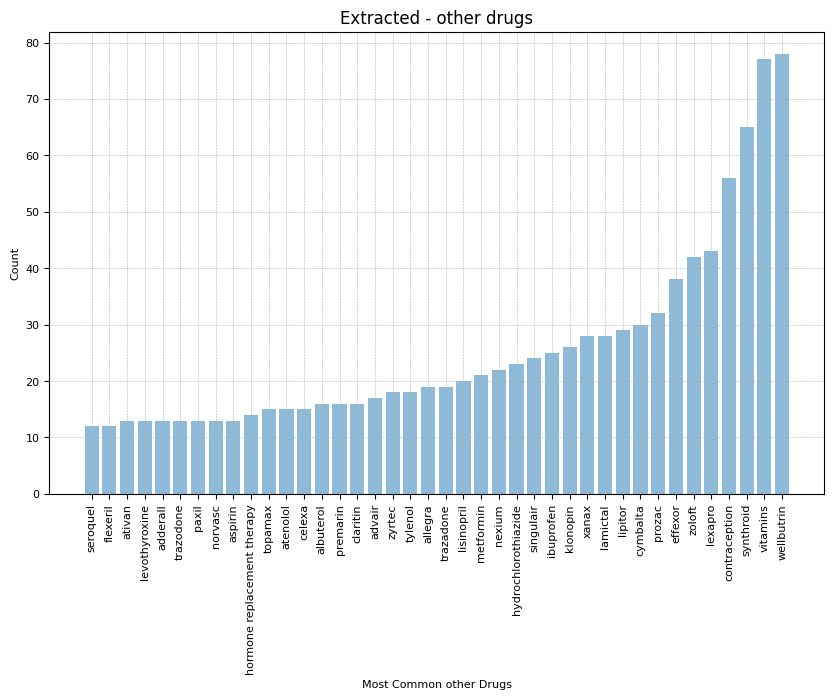

In [ ]:
# Convert the dictionary items into a list of key-value pairs and sort it
drugs_dict = sorted(counts2.items(), key=operator.itemgetter(1))
x, y = zip(*drugs_dict)

# Create bar plot
plt.figure(figsize=(10,6))
plt.bar(x[-41:-1], y[-41:-1], alpha=0.5)
plt.xlabel("Most Common other Drugs", fontsize=8)
plt.ylabel("Count", fontsize=8)
plt.title("Extracted - other drugs")
plt.xticks(rotation = 90, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(linestyle = '--', linewidth = 0.4)
plt.show()

### Medical conditions

In [ ]:
medical_conditions = read_pickle('extracted_conditions')

In [ ]:
find_nones = [i for i, c in enumerate(medical_conditions.values()) if 'None' in c]


In [ ]:
df.ConditionReason.iloc[find_nones].values

array(['anti-inflammatory/pain', '75 mg', 'headake', 'back',
       'muscle pain/spasms - legs',
       'i was in a risk group - frontline pharmacist', 'u/i',
       'Elarge pores blackheads around nose & cheeks',
       'To prevent pregnancy', 'wanted to drop about 30 lbs', 'diet',
       'add', 'add', 'lack of attention for studying/school', 'add',
       'attention issues; to much to do/ too little time', 'Fun',
       'Controceptive; help with pmsd', 'ED', 'lashes', 'to help sleep',
       'Qit smoking', '1MG', 'Undiagnosed ',
       'improvement of skin appearance/health',
       'To reduce/eliminate wrinkling '], dtype=object)

In [ ]:
# Manualy extract conditions
none_conditions = [['post-surgery pain'], ['depression'], ['headache'],
                   ['backpain'], ['muscles pain'], ['flu'], ['uti'], ['acne'],
                   ['contraception'], ['overweight'], ['overweight'],
                   ['add'], ['add'], ['add'], ['add'], ['add'], ['add'],
                   ['psmd'], ['erectile dysfunction'], ['lashes implant'],
                   ['insomnia'], ['smoking'], ['hair loss'], ['eczema'],
                   ['acne'], ['anti-aging']]
len(none_conditions)

26

In [ ]:
update_dict = dict(zip(find_nones, none_conditions))

In [ ]:
medical_conditions.update(update_dict)

In [ ]:
out = {k:v for k, v in medical_conditions.items() if '\n' in v[0]}
out

{76: ['sleep disruption due to hot flashes at night\n\nHealth Conditions:\n- sleep disruption\n- hot flashes'],
 1566: ['Substitute for a barbiturate\n\nNone'],
 1744: ['recovery from a brainstem stroke\n\nHealth Conditions:\nbrainstem stroke'],
 2276: ['loose weight\n\nOutput:\nNone'],
 2724: ['forehead frown lines\n\nOutput:\nNone'],
 2917: ['not sleeping\n\nOutput:\nNone'],
 2976: ['Poor sleep with frequent wakefulness\n\nOutput:\nSleep disorders'],
 3015: ['Stop Smoking Aid\n\nOutput:\nNone'],
 3204: ['Fine lines\n\nOutput:\nNone'],
 3211: ['fine lines\n\nOutput:\nNone']}

In [ ]:
df.iloc[1566]

Level                                                        patient
Age                                                               44
Gender                                                          male
ConditionReason                         Substitute for a barbiturate
OtherCondition                                            Depression
OtherDrug                                                      Xanax
DrugName                                      Klonopin (Clonazepam) 
Category           Anticonvulsants Anticonvulsants Benzodiazepine...
OverallRating                                                     10
Effectiveness                                       Highly Effective
SideEffectLevel                                      No Side Effects
Dosage             2mg  taken three times daily for the period of...
Benefit            able to sleep well and did not need to take Tu...
SideEffect                                                       NaN
CommentReview      seems to be a n

In [ ]:
remove_gpt_markup = [['sleep disruption', 'hot flashes'], ['depression'],
                     ['brainstem stroke'], ['overweight'], ['anti-aging'],
                     ['insomnia'], ['sleep disorder'], ['smoking'],
                     ['anti-aging'], ['antiaging']]
len(remove_gpt_markup)

10

In [ ]:
medical_conditions.update(dict(zip(out.keys(), remove_gpt_markup)))

In [ ]:
for k,v in medical_conditions.items():
    if 'post-surgery' in v:
        print(k,v)

In [ ]:
concat_conditions = []
for conds in medical_conditions.values():
        concat_conditions.extend(conds)
# concat_conditions
concat_conditions = [c.lower() for c in concat_conditions]

In [ ]:
conditions_count = Counter(concat_conditions)

In [ ]:
from operator import itemgetter

In [ ]:
def plot_dictionary(data_dict=None, x_label=None, y_label='count', title=None,
              size=(10, 6)):
    sorted_data = sorted(data_dict.items(), key=itemgetter(1))
    x, y = zip(*sorted_data)
    plt.figure(figsize=size)
    plt.bar(x[-50:], y[-50:], alpha=0.5)
    plt.xlabel(f'Most common {x_label}', fontsize=8)
    plt.ylabel(y_label, fontsize=8)
    plt.title(title)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(linestyle='--', linewidth=0.4)
    return plt.show()

In [ ]:
def pop_keys(counter_dict, pattern=None):
    pop_keys = []
    for k in counter_dict.keys():
        if pattern in k:
            pop_keys.append(k)
    print(pop_keys)
    return pop_keys

In [ ]:
def update_counts_with_list(count_dict=None, pattern_list=None, key=None):
    if key in pattern_list:
        pattern_list.remove(key)
    for k in count_dict.copy().keys():
        if k in pattern_list:
            count_dict[key] += count_dict[k]
    for k in pattern_list:
        del count_dict[k]
    return count_dict

In [ ]:
thyroid = pop_keys(conditions_count, pattern='thyroid')

['hypothyroid-related dry skin', 'hypothyroidism', 'thyroid', 'low thyroid levels', 'hypothyroid', 'hypothyroid problem', 'low thyroid production', 'low thyroid', 'underactive thyroid', 'thyroid disease', 'thyroid disorder', 'hypothyroid symptoms', 'thyroid removal', 'low underactive thyroid', 'thyroid cancer', 'hypothyroid deficiency', 'hashimotos hypothyroidism', 'hashimotos thyroiditis', 'thyroidectomy', 'mild hypothyroidism', 'slow thyroid', 'total thyroidectomy']


In [ ]:
thyroid.remove('thyroid cancer')
thyroid.remove('thyroid removal')
thyroid.remove('thyroidectomy')

In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=thyroid,
                                           key='hypothyroidism')

In [ ]:
conditions_count = update_counts(conditions_count, pattern='thyroidect',
                                 key='thyroidectomy')
conditions_count = update_counts(conditions_count, pattern='thyroid removal',
                                 key='thyroidectomy')

In [ ]:
sleep_disorders = pop_keys(conditions_count, pattern='sleep')

['sleep disorders', 'sleep disruption', 'difficulty sleeping', 'sleep aid', 'sleep disorder', 'sleeping disorder', 'sleep', 'sleeplessness', 'inability to fall asleep', 'sleep problem', 'poor sleep quality', 'sleep problems', 'sleeping aid', 'trouble sleeping', 'unable to sleep', 'sleepiness', 'sleep apnea', 'unrestful sleep', 'trouble sleeping at night', 'daytime sleepiness', 'shift work sleep disorder', 'central sleep apnea', 'delayed sleep phase syndrome', 'restless sleep', 'sleep deprivation', 'inability to fall asleep easily', 'sleeping', 'cant sleep', 'sleeping problems']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=sleep_disorders,
                                           key='sleep disorders')

In [ ]:
insomnia = pop_keys(conditions_count, pattern='insomni')

['chronic insomnia', 'insomnia', 'rx induced insomnia', 'severe insomnia', 'tired during day\n\nhealth conditions:\n- insomnia', 'shift work insomnia', 'minor insomnia']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=insomnia,
                                           key='insomnia')

In [ ]:
conditions_count = update_counts(conditions_count, pattern='insomnia',
                                 key='sleep disorders')

In [ ]:
adhd = pop_keys(conditions_count, pattern='adhd')

['adhd', 'adhd (predominantly inattentive)', 'adhd (attention deficit hyperactivity disorder)']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=adhd,
                                           key='adhd')
conditions_count = update_counts(conditions_count, pattern='adhd',
                                 key='addh')

In [ ]:
conditions_count['addh-adhd'] = conditions_count['addh']
del conditions_count['addh']

In [ ]:
rheuma = pop_keys(conditions_count, pattern='rheu')
arthritis = pop_keys(conditions_count, pattern='arth')

['rheumatoid arthritis', 'polymyalgia rheumatica (pmr)']
['arthritis pain', 'arthritis', 'osteoarthritis', 'arthritic joint pain', 'arthritis in knees', 'rheumatoid arthritis', 'cervical osteoarthritis', 'inflammatory arthritis', 'psoriatic arthritis', 'rhuematoid arthritis', 'reactive arthritis']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=arthritis,
                                           key='arthritis')

In [ ]:
rheuma = pop_keys(conditions_count, pattern='rheu')

['polymyalgia rheumatica (pmr)']


In [ ]:
conditions_count = update_counts(conditions_count, pattern=rheuma[0],
                                           key='rheumatoid arthritis')

In [ ]:
conditions_count = update_counts(conditions_count, pattern='rheuma',
                                 key='arthritis')

In [ ]:
conditions_count['arthritis'] += conditions_count['ra']
del conditions_count['ra']

In [ ]:
blood_pressure = pop_keys(conditions_count, pattern= 'blood pressu')
hypertension = pop_keys(conditions_count, pattern='hyperten')
hypertension.extend(blood_pressure)

['high blood pressure', 'blood pressure']
['hypertension', 'high-normal hypertension']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=hypertension,
                                           key='hypertension')

In [ ]:
bipolar = pop_keys(conditions_count, pattern='polar')

['bipolar depression', 'bipolar', 'bipolar disorder', 'bipolar ii', 'bi-polar 2', 'bi-polar', 'bipolar disorder ii', 'bipolar disorder type ii', 'bipolar i', 'bipolar mania', 'bipolar 2']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=bipolar,
                                           key='bipolar disorder')

In [ ]:
disk_hernia = pop_keys(conditions_count, pattern='disk')

['budging disk in neck', 'disk hernia', 'herniated disk in my lower back', 'herniated disk']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=disk_hernia,
                                           key='disk hernia')

In [ ]:
back_pain = pop_keys(conditions_count, pattern='back')

['back pain', 'chronic back pain', 'sore lower back', 'back stiffness', 'severe back pain', 'severe low back pain', 'failed back syndrome', 'backpain', 'low back pain', 'acute and long term chronic and severe back pain', 'back spasm', 'back acne', 'lower back', 'back injury', 'upper back pain', 'upper back', 'lower back pain']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=back_pain,
                                           key='back pain')

In [ ]:
birth = pop_keys(conditions_count, pattern='birth')

['birth control', 'birth prevention', 'birth control method']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=birth,
                                           key='birth control')

In [ ]:
contraception = pop_keys(conditions_count, pattern='contrace')

['contraception', 'contraception pill', 'contraceptive']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=contraception,
                                           key='contraception')
conditions_count['birth control'] += conditions_count['contraception']
del conditions_count['contraception']

In [ ]:
meno = pop_keys(conditions_count, pattern='menop')

['menopause symptoms', 'menopausal symptoms', 'peri-menopause', 'surgical menopause', 'menopausal', 'menopause', 'perimenopause', 'post menopausal', 'post menopause symptoms', 'post-menopausal osteopenia', 'postmenopausal osteopenia', 'menopause problems', 'pre-menopause', 'perimenopause symptoms', 'postmenopausal vaginal atrophy', 'peri-menopausal symptoms']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=meno,
                                           key='menopause symptoms')

In [ ]:
conditions_count['all stages menopause symptoms'] = conditions_count['menopause symptoms']
del conditions_count['menopause symptoms']

In [ ]:
allergies = pop_keys(conditions_count, pattern='allerg')

['allergies', 'severe allergies', 'seasonal allergies', 'allergic rash', 'allergic rhinitis', 'skin allergy', 'allergy', 'environmental allergies', 'year round allergies', 'allergic condition', 'spring allergies', 'allergy cough', 'indoor allergies', 'mold allergies', 'tree allergies', 'allergic reaction to a cosmetic', 'severe non-allergic bronchitis', 'dust allergy', 'allergy induced asthma', 'sinus allergies', 'seasonal allergy', 'sinus allergy', 'nasal allergies', 'nasal allergy', 'swollen passages from allergies']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=allergies,
                                           key='allergies')

In [ ]:
bipolar_01 = pop_keys(conditions_count, pattern='manic')


['mixed manic episodes', 'manic depression']


In [ ]:
conditions_count['bipolar disorder'] += conditions_count['mixed manic episodes']
conditions_count['bipolar disorder'] += conditions_count['manic depression']
del conditions_count[bipolar_01[0]]
del conditions_count[bipolar_01[1]]

In [ ]:
acne = pop_keys(conditions_count, pattern='acne')
cholesterol = pop_keys(conditions_count, pattern='choles')
depression = pop_keys(conditions_count, pattern='depress')

['acne', 'adult acne', 'cystic acne', 'severe acne', 'mild acne', 'localized acne', 'acne rosacea', 'hormonal acne', 'acne control', 'cure for acne', 'facial acne', 'adult onset acne', 'mild hormonal acne', 'acne vulgaris', 'nodular acne', 'moderately severe acne', 'acne scarring', 'serious acne', 'severe nodular acne', 'minor acne', 'acne scars']
['cholesterol', 'elevated cholesterol', 'high cholesterol', 'reduce cholesterol', 'cholesterol levels', 'high cholesterol level', 'high blood cholesterol levels', 'hypercholesterolemia', 'familial hypercholesterolaemia', 'high blood cholesterol', 'elevated cholesterol level', 'high total cholesterol', 'cholesterol problems']
['depression', 'clinical depression', 'greater depression', 'situational atypical depression', 'major depressive disorder', 'severe depression', 'mild depression', 'major depression', 'reccurrent depression', 'chronic depression', 'anti-depressant', 'post-trauma depression', 'major chronic depressive disorder', 'chronic a

In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=acne,
                                           key='acne')
conditions_count = update_counts_with_list(conditions_count, pattern_list=depression,
                                           key='depression')

In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=cholesterol,
                                           key='high cholesterol')

In [ ]:
weight = pop_keys(conditions_count, pattern='weigh')

['weight gain', 'weight loss', 'lose weight', 'overweight', 'weight']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=weight,
                                           key='weight')

In [ ]:
conditions_count['weight control'] += conditions_count['weight']
conditions_count['weight control'] += conditions_count['obesity']
del conditions_count['obesity']
del conditions_count['weight']

In [ ]:
aging = pop_keys(conditions_count, pattern='aging')
wrink = pop_keys(conditions_count, pattern='wrink')

['anti-aging', 'aging skin', 'aging', 'skin aging', 'aging skin on face', 'aging prevention', 'photoaging', 'premature aging', 'anti aging', 'extrinsic aging', 'antiaging']
['wrinkles around eyes', 'wrinkles', 'anti-wrinkle', 'wrinkle reduction', 'fine wrinkles', 'wrinkling around the eyes', 'wrinkling around the lips', 'wrinkle prevention']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=aging,
                                           key='anti-aging')
conditions_count = update_counts_with_list(conditions_count, pattern_list=wrink,
                                           key='wrinkles')

In [ ]:
conditions_count['anti-aging'] += conditions_count['wrinkles']
del conditions_count['wrinkles']

In [ ]:
bladder = pop_keys(conditions_count, pattern='bladder')

['bladder infections', 'bladder infection', 'bladder pressure', 'overactive bladder', 'spastic bladder']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=bladder,
                                           key='bladder infections')
conditions_count['uti'] += conditions_count['bladder infections']
del conditions_count['bladder infections']

In [ ]:
uti = pop_keys(conditions_count, pattern='urina')

['urinary tract infection', 'frequent and urgent urination', 'chronic urinary infections', 'urinary tract infections']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=uti,
                                           key='urinary tract infection')
conditions_count['uti'] += conditions_count['urinary tract infection']
del conditions_count['urinary tract infection']

In [ ]:
headache = pop_keys(conditions_count, pattern='heada')

['headache', 'tension headaches', 'chronic headaches', 'tension headache', 'chronic tension headache', 'chronic tension headaches', 'headaches', 'migraine headaches', 'severe headache', 'chronic daily headache', 'cluster headache', 'severe headaches']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=headache,
                                           key='headache')

In [ ]:
migrane = pop_keys(conditions_count, pattern='migraine')

['migraines', 'migraine', 'menstrual migraines', 'prevent menstrual migraines', 'migraine prevention', 'daily migraines']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=migrane,
                                           key='migraine')

In [ ]:
conditions_count['migraine-headche'] = conditions_count['headache'] + conditions_count['migraine']

del conditions_count['migraine']
del conditions_count['headache']

In [ ]:
conditions_count['erectile dysfunction'] += conditions_count['ed']
del conditions_count['ed']

In [ ]:
pigment = pop_keys(conditions_count, pattern='pigment')


['facial hyperpigmentation', 'hyperpigmentation', 'pigmentation']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=pigment,
                                           key='hyperpigmentation')

In [ ]:
pain = pop_keys(conditions_count, pattern='pain')

['pain', 'neck pain', 'post-surgery pain', 'severe body and joint pains', 'post shoulder surgery pain', 'knee pain', 'back pain', 'chronic neck pain', 'pain relief', 'pain after surgery', 'severe knee pain', 'tooth pain', 'cancer related pain', 'constant pain', 'severe chronic pain', 'right leg pain', 'myofascial pain', 'neuropathic pain', 'complex regional pain syndrome', 'pain in my legs', 'chronic pain', 'leg pain', 'severe wrist pain', 'nerve pain', 'neural pain', 'severe neck pain', 'post-surgical pain', 'post surgical pain', 'pain control', 'chronic nerve pain', 'hip pain', 'shoulder pain', 'pain management', 'hand pain', 'post-op pain', 'post surgery stomach pain', 'root canal pain', 'pain from broken arm', 'sciatic pain', 'muscles pain', 'ear pain', 'stomach pain', 'severe stomach pains', 'chest pain', 'shooting nerve-type pain in legs', 'menstrual pain', 'muscle pain', 'chronic musculoskeletal pain', 'left shoulder pain', 'eustachian tube pain']


In [ ]:
excluded_pain = ['surg', 'post-' 'root', 'myo', 'broken', 'cancer', 'stomach', 'ear', 'eustach', 'menstr']
for xp in excluded_pain:
    for p in pain:
        if xp in p:
            pain.remove(p)

In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=pain,
                                           key='neural pain')

In [ ]:
conditions_count['musculoskeletal-neural pain'] += conditions_count['neural pain']
del conditions_count['neural pain']

In [ ]:
conditions_count['birth control'] += conditions_count['pregnancy prevention']
del conditions_count['pregnancy prevention']

In [ ]:
panic = pop_keys(conditions_count, pattern='panic')

['panic attacks', 'panic disorder', 'panic attack']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=panic,
                                           key='panic attacks')

In [ ]:
acid = pop_keys(conditions_count, pattern='acid')

['acid reflux', 'excess stomach acid', 'stomach acid reflux', 'stomach acid', 'excess acidity']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=acid,
                                           key='acid reflux')
conditions_count['acid reflux'] =  conditions_count['heartburn'] + conditions_count['chronic heartburn']
del conditions_count['heartburn'], conditions_count['chronic heartburn']

In [ ]:
smoking= pop_keys(conditions_count, pattern='smok')

['stop smoking', 'smoking cessation', 'quit smoking', 'smoking', 'stopping smoking', 'smoker', 'quitting smoking']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=smoking,
                                           key='smoking cessation')

In [ ]:
sinus = pop_keys(conditions_count, pattern='sinus')

['sinusitis', 'sinus infections', 'chronic sinus congestion', 'sinus infection', 'severe sinus infection', 'major sinus infection', 'chronic sinusitis', 'acute sinusitis', 'sinus', 'severe recurrent sinus infections', 'sinus congestion', 'chronic sinus infection', 'chronic sinus infections', 'congested sinuses', 'sinus polyps', 'sinus problems']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=sinus,
                                           key='sinusitis')

In [ ]:
diabetes = pop_keys(conditions_count, pattern='diabe')

['diabetes', 'diabetes type ii', 'type ii diabetes mellitus', 'type 2 diabetes', 'diabetes type 2', 'insulin dependent diabetes mellitus']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=diabetes,
                                           key='diabetes')

In [ ]:
conditions_count['add-addh-adhd'] = conditions_count['add'] + conditions_count['addh-adhd']
del conditions_count['add'], conditions_count['addh-adhd']

In [ ]:
heart = pop_keys(conditions_count, pattern='heart')
heart.remove('severe heartburn')

['fast heart rate', 'rapid heartbeat', 'heart murmur', 'severe heartburn', 'family history of heart disease', 'heart conditions']


In [ ]:
conditions_count = update_counts_with_list(conditions_count, pattern_list=heart,
                                           key='heart conditions')

In [ ]:
conditions_count['hypertension-heart conditions'] = conditions_count['hypertension'] + \
                                                    conditions_count['heart conditions']

del conditions_count['hypertension'], conditions_count['heart conditions']

In [ ]:
reflux = pop_keys(conditions_count, pattern='reflux')

['acid reflux', 'reflux', 'gastroesophageal reflux disease', 'laryngopharyngeal reflux', 'gerd (gastroesophageal reflux disease)', 'gastric esophageal reflux', 'gastric esophageal reflux disease']


In [ ]:
conditions_count = update_counts_with_list(conditions_count,
                                           pattern_list=reflux,
                                           key='gerd-reflux')

In [ ]:
gerd = pop_keys(conditions_count, pattern='gerd')

['gerd', 'gerd-reflux']


In [ ]:
conditions_count = update_counts_with_list(conditions_count,
                                           pattern_list=gerd,
                                           key='gerd-reflux')

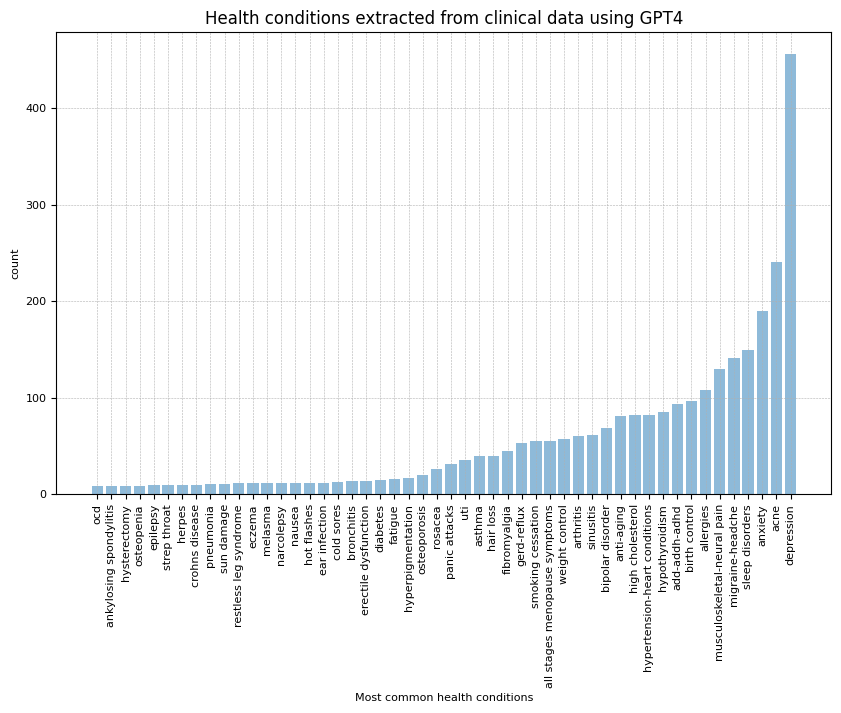

In [ ]:
plot_dictionary(conditions_count, x_label='health conditions',
                title='Health conditions extracted from clinical data using GPT4')

### Other health conditions

In [ ]:
other_health = read_pickle(fname='other_extracted')

In [ ]:
other_conditions = []
for conds in other_health.values():
        other_conditions.extend(conds)
# concat_conditions
other_conditions = [c.lower() for c in other_conditions]

In [ ]:
conditions_count_ = Counter(other_conditions)

In [ ]:
depression_ = pop_keys(conditions_count_, pattern='depress')
depression_.remove('manic depression')

['depression', 'mild depression', 'postpartum depression', 'slight depression', 'chronic depression', 'depressed', 'clinical depression', 'severe depression', 'bouts of depression', 'low level depression', 'depressive episodes', 'bipolar depression', 'mild situational depression', 'manic depression', 'depressive disorder']


In [ ]:
conditions_count_ = update_counts_with_list(conditions_count_,
                                           pattern_list=depression_,
                                           key='depression')

In [ ]:
acne_ = pop_keys(conditions_count_, pattern='acne')

['acne', 'acne scars', 'adult acne', 'acne scarring', 'moderate acne', 'mild acne', 'syctic acne', 'mild acne scarring', 'acne rosacea', 'increase in acne', 'severe nodular acne']


In [ ]:
conditions_count_ = update_counts_with_list(conditions_count_,
                                           pattern_list=acne_,
                                           key='acne')

In [ ]:
black = pop_keys(conditions_count_, pattern='black')

['blackheads', 'blackheads on nose']


In [ ]:
conditions_count_ = update_counts_with_list(conditions_count_,
                                           pattern_list=black,
                                           key='acne')

In [ ]:
pressu_ = pop_keys(conditions_count_, pattern='blood press')

['high blood pressure', 'low blood pressure', 'labile blood pressure', 'elevated blood pressure', 'blood pressure', 'moderately elevated blood pressure', 'borderline high blood pressure']


In [ ]:
conditions_count_ = update_counts_with_list(conditions_count_,
                                           pattern_list=pressu_,
                                           key='hypertension')

In [ ]:
def plot_without_none_dict(data_dict=None, x_label=None, y_label='count', title=None,
                           size=(10, 6)):
    sorted_data = sorted(data_dict.items(), key=itemgetter(1))
    x, y = zip(*sorted_data)
    plt.figure(figsize=size)
    plt.bar(x[-51:-1], y[-51:-1], alpha=0.5)
    plt.xlabel(f'Most common {x_label}', fontsize=8)
    plt.ylabel(y_label, fontsize=8)
    plt.title(title, fontsize=10)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(linestyle='--', linewidth=0.4)
    return plt.show()

In [ ]:
hypothy_ = pop_keys(conditions_count_, pattern='hypothy')

['hypothyroidism', 'hypothyroid', 'mild hypothyroidism', 'hashimotos hypothyroidism']


In [ ]:
conditions_count_ = update_counts_with_list(conditions_count_,
                                           pattern_list=hypothy_,
                                           key='hypothyrodism')

In [ ]:
asthma = pop_keys(conditions_count_, pattern='asthm')

['asthma', 'mild asthma', 'childhood asthma', 'allergic asthma', 'bronchial asthma', 'severe asthma']


In [ ]:
conditions_count_ = update_counts_with_list(conditions_count_,
                                           pattern_list=asthma,
                                           key='asthma')

In [ ]:
cholesterol_ = pop_keys(conditions_count_, pattern='cholester')

['cholesterol', 'high cholesterol', 'elevated cholesterol', 'hypercholesterolemia', 'high bad cholesterol']


In [ ]:
conditions_count_ = update_counts_with_list(conditions_count_,
                                           pattern_list=cholesterol_,
                                           key='high cholesterol')

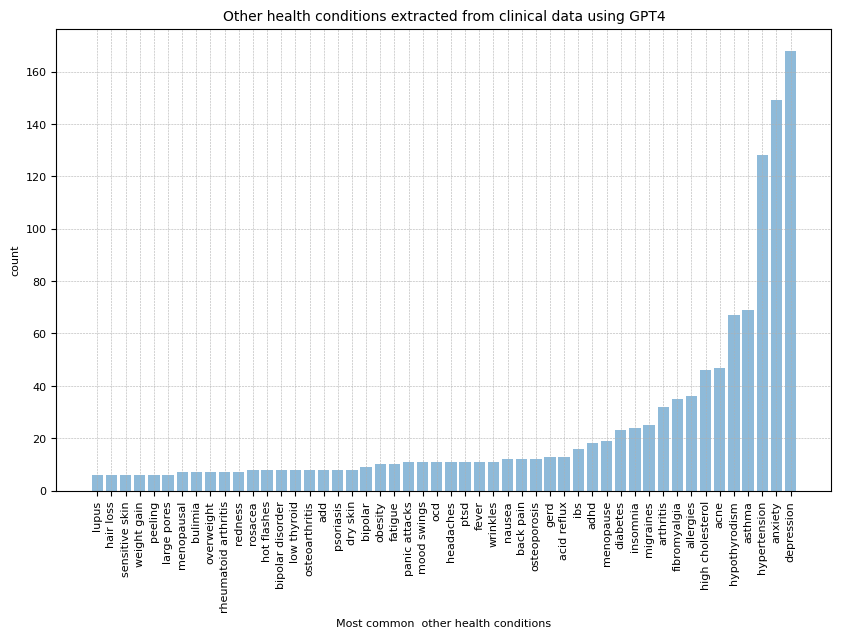

In [ ]:
plot_without_none_dict(conditions_count_, x_label=' other health conditions',
                       title='Other health conditions extracted from clinical data using GPT4')

In [ ]:
pickle_file('healt_cond_dict', conditions_count)
pickle_file('other_healt_dict', conditions_count_)

## Conclusion


Clinical data are labour-intensive to clean. GPT4 corrected the clinical data's misspellings and facilitated the extraction. However, the input of the generative model can vary run by run. Despite using a temperature of 0 to control the model's randomness, some outputs were returned in different formats and required additional processing.
In this exercise, the conditions and extraction were performed patient by patient. Previous attempts to produce outputs using big chunks of text resulted in laziness; GPT4 will not generate an output for some input rows. The dictionaries generated by chat GPT4 also required further grouping for conditions or drugs with the meaning of drug formulation. This grouping could also have been done using Chat GPT4. All models used extracted entities in an unsupervised manner. No fine-tuning was done before content extraction.  This work shows that combining NER, GPT4 and human correction/feedback can ensure an accurate extraction of clinical entities. The results show that __depression__, __anxiety__, __acne__, __hypertension__, and __hypothyroidism__ are common health conditions.

__Bupropion__ (Wellbutrin), __Venlafaxine__ for depression, __Levothyroxine__ (Synthroid) for hypothyroidism and tretinoin for acne are common medications used for the top conditions in this dataset.